In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [5]:
df.shape

(1000, 40)

# Problem Statement:-

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
# Dropping _c39 as it has all null values
df.drop('_c39',axis=1,inplace=True)

In [8]:
df['police_report_available'].value_counts()
    

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [9]:
df.groupby('police_report_available')['fraud_reported'].value_counts()

police_report_available  fraud_reported
?                        N                 254
                         Y                  89
NO                       N                 257
                         Y                  86
YES                      N                 242
                         Y                  72
Name: fraud_reported, dtype: int64

# The ratio of Y and N is same for police report available or not,so replacing ? by No

In [10]:
df['police_report_available']=df['police_report_available'].replace('?','NO')

In [11]:
df['police_report_available'].value_counts()


NO     686
YES    314
Name: police_report_available, dtype: int64

In [12]:
cat=[]
for col in df:
    if df[col].dtype == 'object':
        cat.append(col)
print(cat)

['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [13]:
for i in df[cat]:
    print(i)
    print(df[i].value_counts())
    
    print('#'*100)

policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
####################################################################################################
policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
####################################################################################################
policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
####################################################################################################
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
####################################################################################################
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        

In [14]:
df.groupby('incident_type')['collision_type'].value_counts()

incident_type             collision_type 
Multi-vehicle Collision   Rear Collision     152
                          Side Collision     152
                          Front Collision    115
Parked Car                ?                   84
Single Vehicle Collision  Rear Collision     140
                          Front Collision    139
                          Side Collision     124
Vehicle Theft             ?                   94
Name: collision_type, dtype: int64

# Clearly missing value in collision type is for parked car and Vehicle Theft,so we can replace by No Collision

In [15]:
df['collision_type']=df['collision_type'].replace('?','No Collision')

In [16]:
# Lets check property damage
df.groupby('property_damage')['incident_severity'].value_counts()

property_damage  incident_severity
?                Major Damage         115
                 Minor Damage         110
                 Total Loss            97
                 Trivial Damage        38
NO               Minor Damage         135
                 Total Loss            98
                 Major Damage          74
                 Trivial Damage        31
YES              Minor Damage         109
                 Major Damage          87
                 Total Loss            85
                 Trivial Damage        21
Name: incident_severity, dtype: int64

# Since we cannot conclude the property damage by Incident Severity.So we can replace by padding

In [17]:
df['property_damage']=df['property_damage'].replace('?',np.nan)
df['property_damage'].isna().sum()

360

In [18]:
df['property_damage']=df['property_damage'].fillna(method='pad')

In [19]:
df['property_damage'].value_counts()

NO     521
YES    479
Name: property_damage, dtype: int64

# EDA

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [21]:
df.nunique().to_frame()

,0
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


<AxesSubplot:>

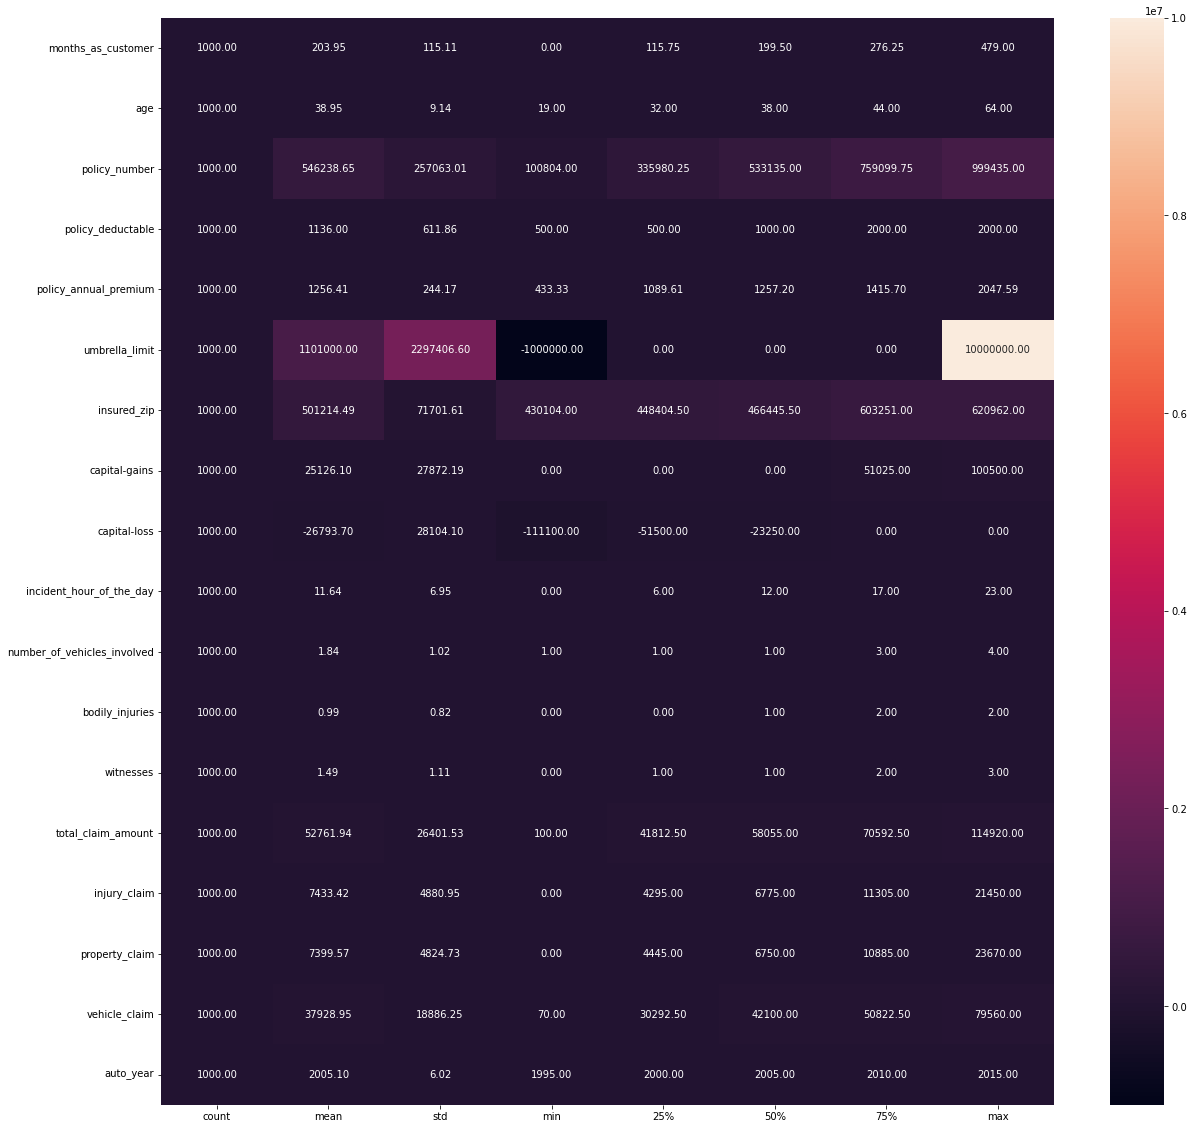

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(df.describe().T,annot=True,annot_kws={'size':10},fmt='.2f')

In [23]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [24]:
df.duplicated().sum()

0

In [25]:
df[cat]

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,17-10-2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,27-06-2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,YES,NO,Mercedes,E400,Y
2,06-09-2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,25-05-1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,...,Major Damage,Police,OH,Arlington,6956 Maple Drive,NO,NO,Chevrolet,Tahoe,Y
4,06-06-2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,...,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,16-07-1991,OH,500/1000,FEMALE,Masters,craft-repair,paintball,unmarried,22-02-2015,Single Vehicle Collision,...,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,YES,NO,Honda,Accord,N
996,05-01-2014,IL,100/300,FEMALE,PhD,prof-specialty,sleeping,wife,24-01-2015,Single Vehicle Collision,...,Major Damage,Fire,SC,Northbend,3092 Texas Drive,YES,NO,Volkswagen,Passat,N
997,17-02-2003,OH,250/500,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,23-01-2015,Multi-vehicle Collision,...,Minor Damage,Police,NC,Arlington,7629 5th St,YES,YES,Suburu,Impreza,N
998,18-11-2011,IL,500/1000,MALE,Associate,handlers-cleaners,base-jumping,wife,26-02-2015,Single Vehicle Collision,...,Major Damage,Other,NY,Arlington,6128 Elm Lane,YES,YES,Audi,A5,N


In [26]:
df.drop(columns=['policy_bind_date','policy_number'],axis=1,inplace=True)

In [27]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [28]:
df.columns



Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

<AxesSubplot:xlabel='age', ylabel='count'>

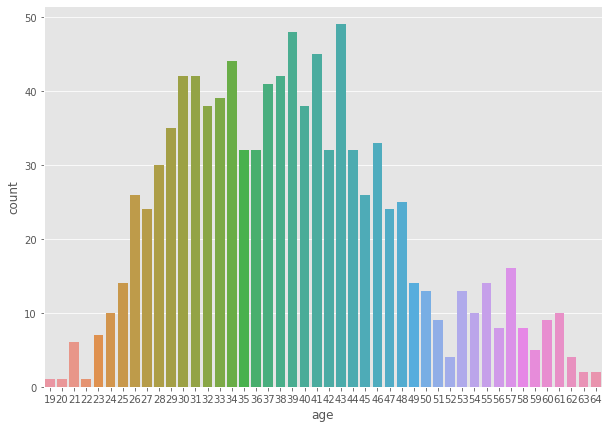

In [29]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
sns.countplot('age',data=df)

<AxesSubplot:xlabel='policy_state', ylabel='count'>

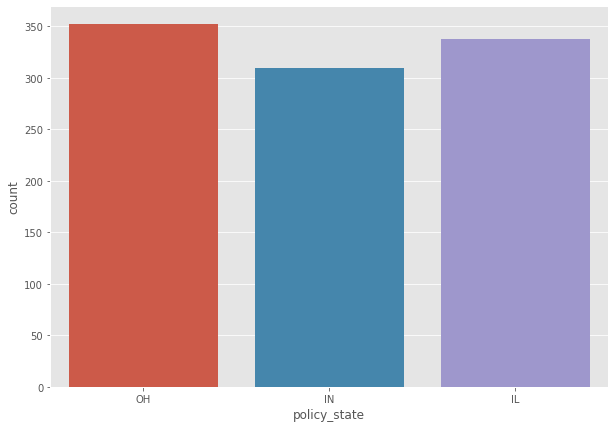

In [30]:
plt.figure(figsize=(10,7))
sns.countplot('policy_state',data=df)

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

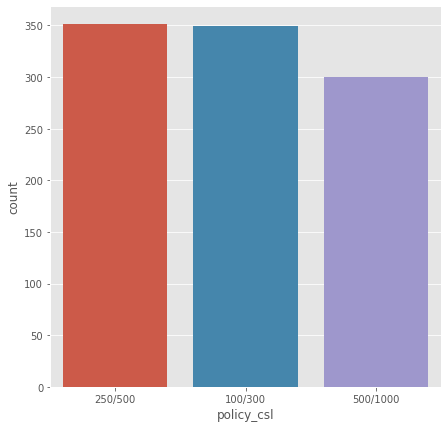

In [31]:
plt.figure(figsize=(7,7))
sns.countplot('policy_csl',data=df)

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

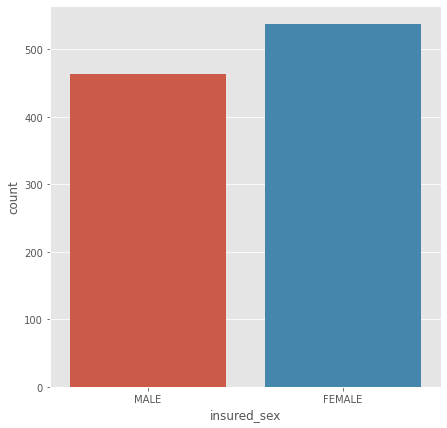

In [32]:
plt.figure(figsize=(7,7))
sns.countplot('insured_sex',data=df)

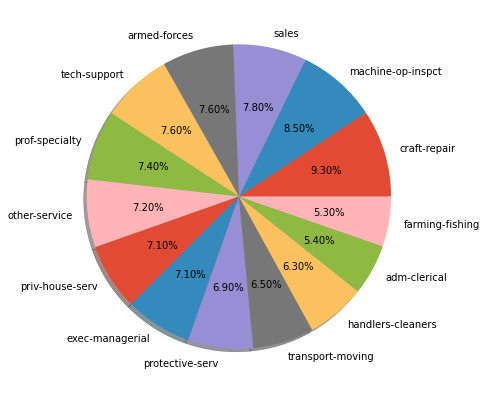

In [33]:
plt.figure(figsize=(7,7))
plt.pie(df['insured_occupation'].value_counts(),autopct='%1.2f%%',shadow=True,labels=df['insured_occupation'].unique())
plt.show()

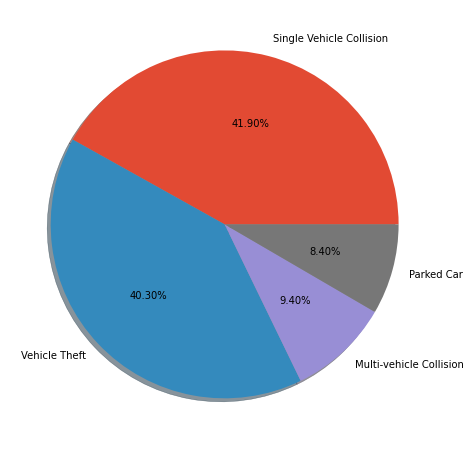

In [34]:
plt.figure(figsize=(8,8))
plt.pie(df['incident_type'].value_counts(),autopct='%1.2f%%',shadow=True,labels=df['incident_type'].unique())
plt.show()

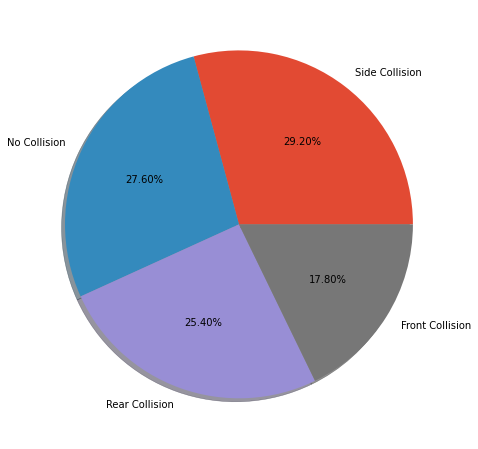

In [35]:
plt.figure(figsize=(8,8))
plt.pie(df['collision_type'].value_counts(),autopct='%1.2f%%',shadow=True,labels=df['collision_type'].unique())
plt.show()

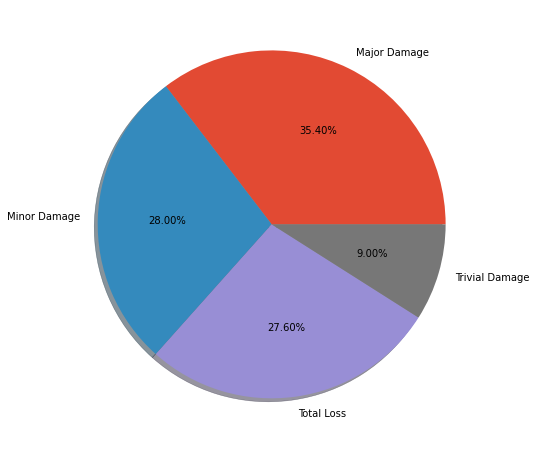

In [36]:
plt.figure(figsize=(8,8))
plt.pie(df['incident_severity'].value_counts(),autopct='%1.2f%%',shadow=True,labels=df['incident_severity'].unique())
plt.show()

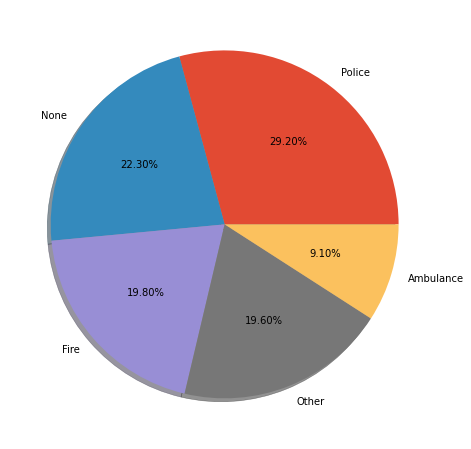

In [37]:
plt.figure(figsize=(8,8))
plt.pie(df['authorities_contacted'].value_counts(),autopct='%1.2f%%',shadow=True,labels=df['authorities_contacted'].unique())
plt.show()

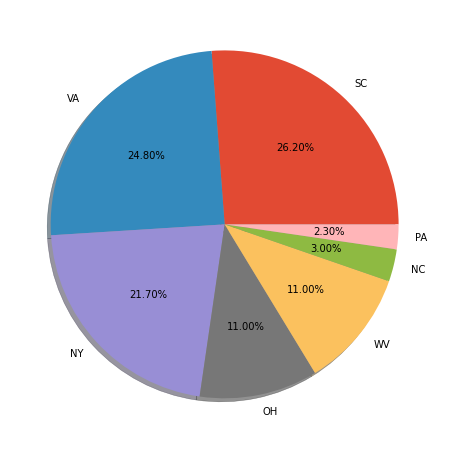

In [38]:
plt.figure(figsize=(8,8))
plt.pie(df['incident_state'].value_counts(),autopct='%1.2f%%',shadow=True,labels=df['incident_state'].unique())
plt.show()

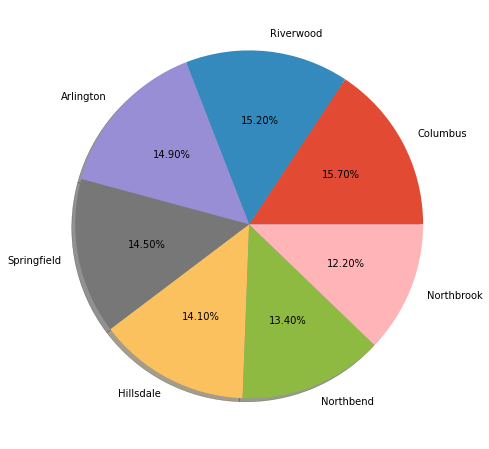

In [39]:
plt.figure(figsize=(8,8))
plt.pie(df['incident_city'].value_counts(),autopct='%1.2f%%',shadow=True,labels=df['incident_city'].unique())
plt.show()

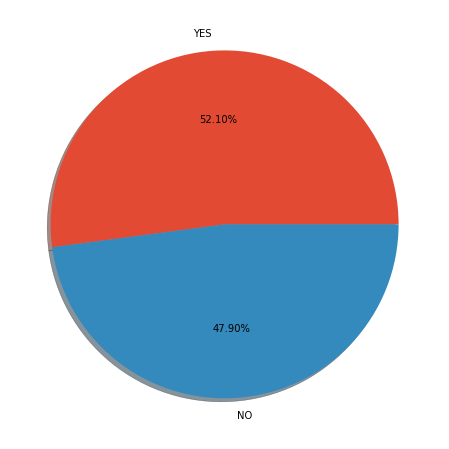

In [40]:
plt.figure(figsize=(8,8))
plt.pie(df['property_damage'].value_counts(),autopct='%1.2f%%',shadow=True,labels=df['property_damage'].unique())
plt.show()

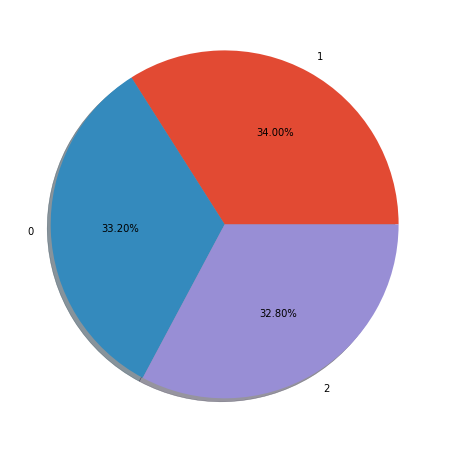

In [41]:
plt.figure(figsize=(8,8))
plt.pie(df['bodily_injuries'].value_counts(),autopct='%1.2f%%',shadow=True,labels=df['bodily_injuries'].unique())
plt.show()

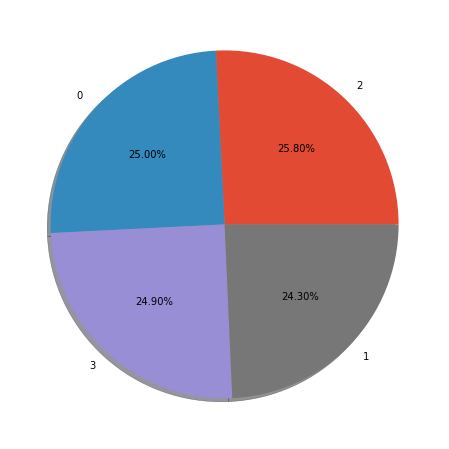

In [42]:
plt.figure(figsize=(8,8))
plt.pie(df['witnesses'].value_counts(),autopct='%1.2f%%',shadow=True,labels=df['witnesses'].unique())
plt.show()

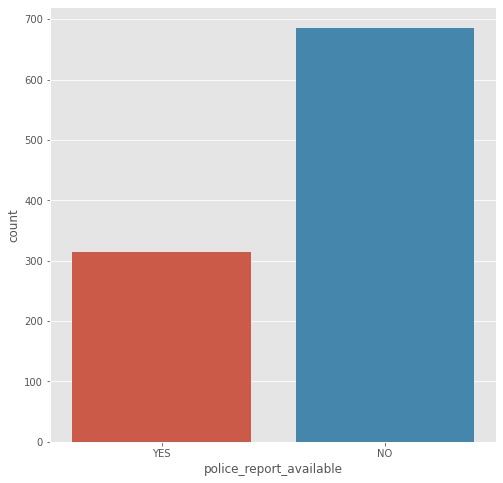

In [43]:
plt.figure(figsize=(8,8))
sns.countplot('police_report_available',data=df)
plt.show()

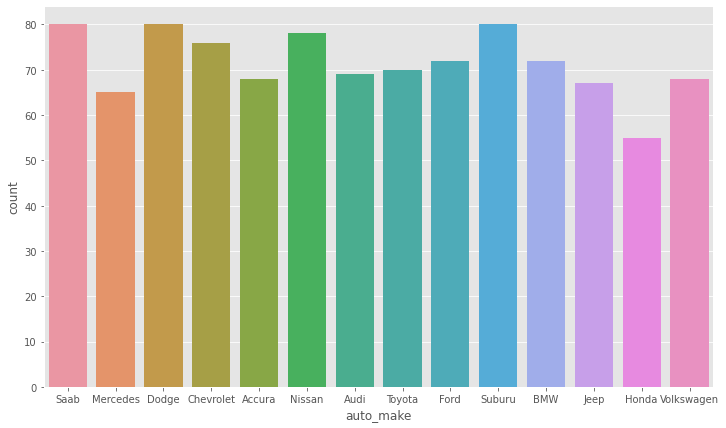

In [44]:
plt.figure(figsize=(12,7))
sns.countplot('auto_make',data=df)
plt.show()

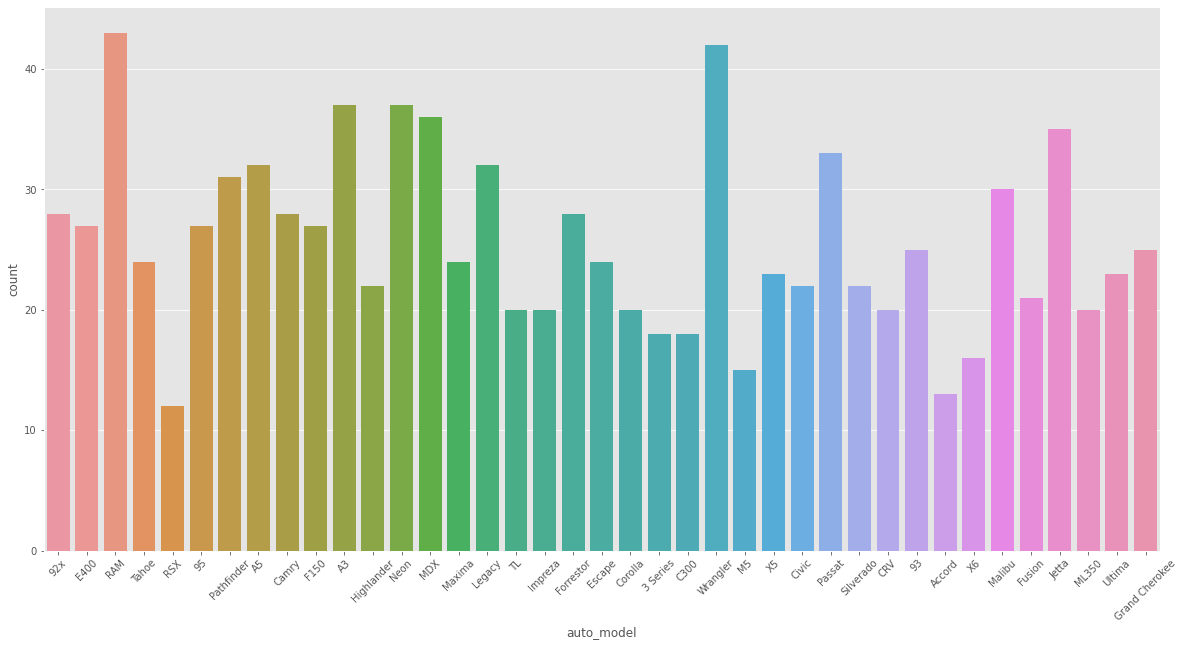

In [45]:
plt.figure(figsize=(20,10))
sns.countplot('auto_model',data=df)
plt.xticks(rotation=45)
plt.show()

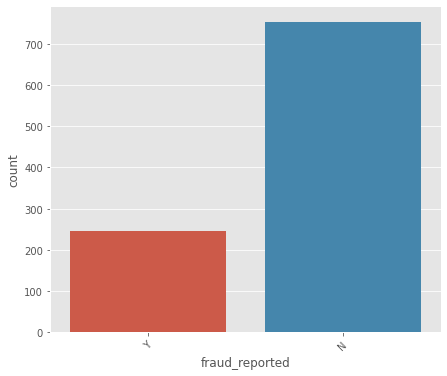

In [46]:
plt.figure(figsize=(7,6))
sns.countplot('fraud_reported',data=df)
plt.xticks(rotation=45)
plt.show()

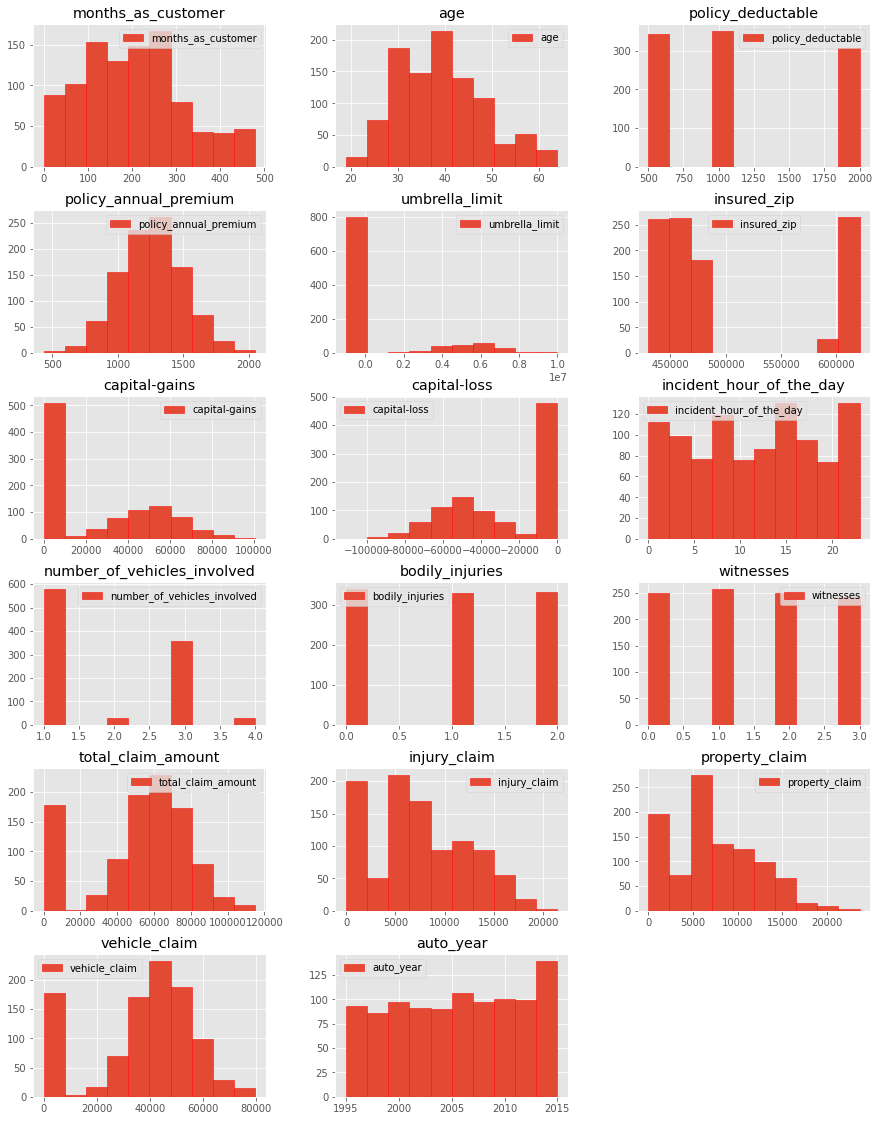

In [47]:
df.hist(figsize=(15,30),edgecolor='red',layout=(9,3),legend=True)
plt.show()

# Observation Of Univariate:-

1. Age between 28 to 47 has high rate of frequency who having automobile insurance.

2. Policy_state OH having high frequency than others.

3. Policy_Csl 250/500 and 100/500 has equal frequency.

4. Female has high frequency of having insurance than male. High school graduate having high frequency in the data.

5. Police Complaint registerted has high frequency with No.

6. The fraud reported has less value with yes than No. so the class is imbalance.

7. Month as customer between 100 to 300 has high frequency of holding automobile insurance policy.

8. Policy deductible has 1000 and 2000 with high frequency.

9. Premium lies between 1000 to 1500 has high frequency.

10. Umberalla lime i.e extra coverage has high frequency of 0 value.

11. Insured_zip has high value of 400000 and 0.

12. Capital Gain and capital loss has high value of 0.

13. Total claim amount lies between 40000 to 80000 has high frequency

# Bivariate Analysis

In [48]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

<AxesSubplot:xlabel='fraud_reported', ylabel='months_as_customer'>

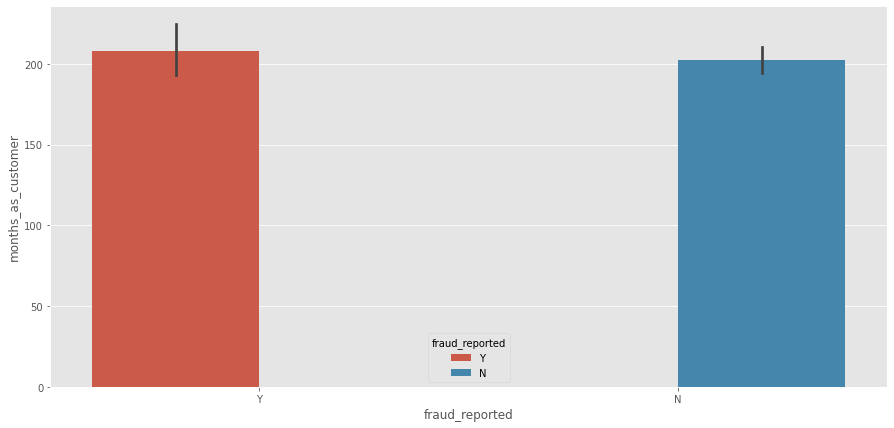

In [49]:
plt.figure(figsize=(15,7))
sns.barplot(x='fraud_reported',y='months_as_customer',hue='fraud_reported',data=df)

## Observation:- Month is high then the chance of fraud claim high 

<AxesSubplot:xlabel='fraud_reported', ylabel='age'>

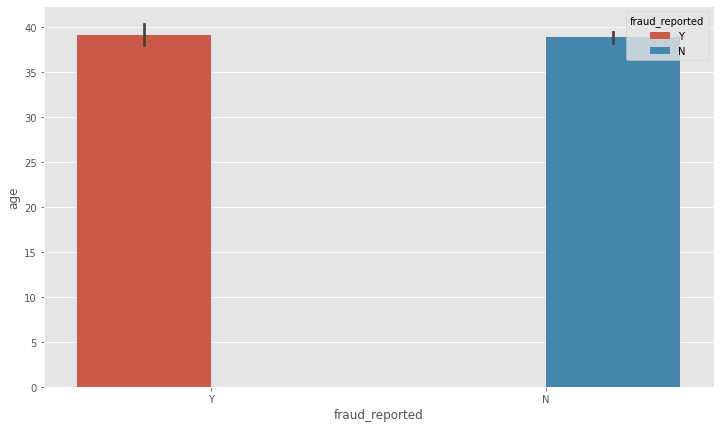

In [50]:
plt.figure(figsize=(12,7))
sns.barplot(x='fraud_reported',y='age',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='policy_state', ylabel='count'>

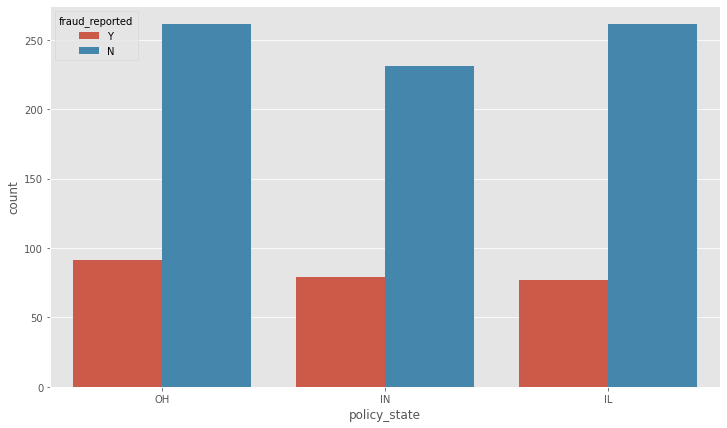

In [51]:
plt.figure(figsize=(12,7))
sns.countplot(x='policy_state',hue='fraud_reported',data=df)

# Observation:- doest show any significance difference

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

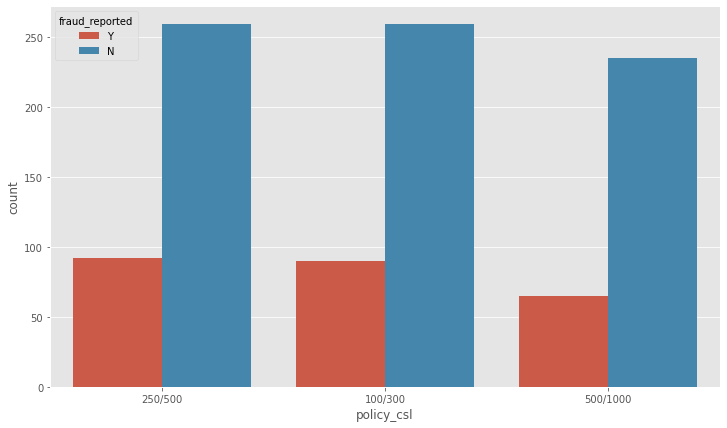

In [52]:
plt.figure(figsize=(12,7))
sns.countplot(x='policy_csl',hue='fraud_reported',data=df)

### Observation:- 250/500 and 100/300 high rate of fraud claim done

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_deductable'>

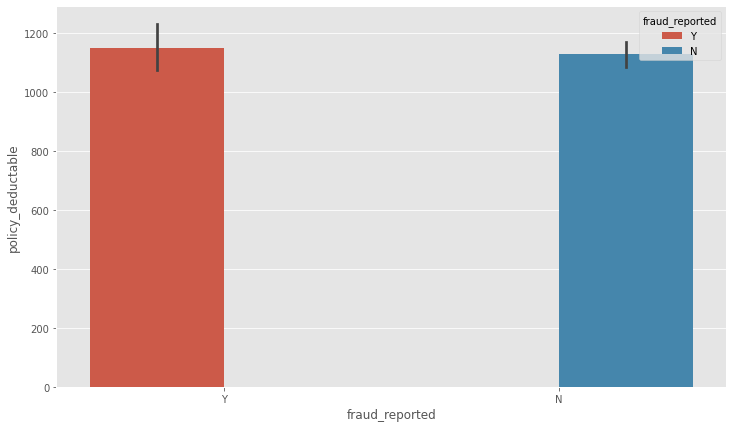

In [53]:
plt.figure(figsize=(12,7))
sns.barplot(x='fraud_reported',y='policy_deductable',hue='fraud_reported',data=df)

### Observation:- Deductible amount does not show significance difference

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

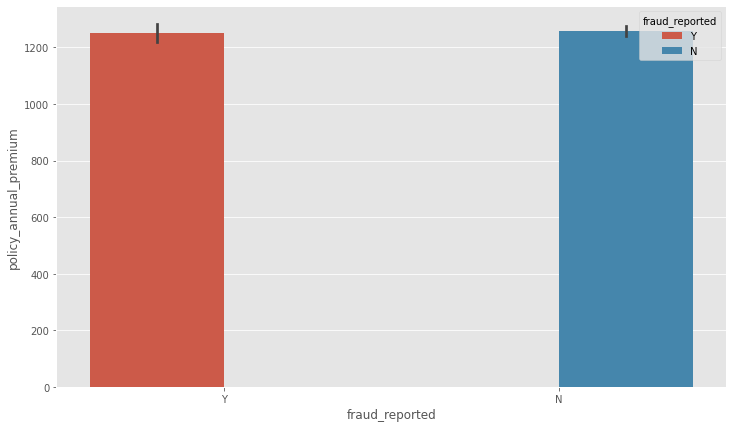

In [54]:

plt.figure(figsize=(12,7))
sns.barplot(x='fraud_reported',y='policy_annual_premium',hue='fraud_reported',data=df)


### Observation :- As we tends towards higher premium the fraud claim rate decreases

<AxesSubplot:xlabel='fraud_reported', ylabel='umbrella_limit'>

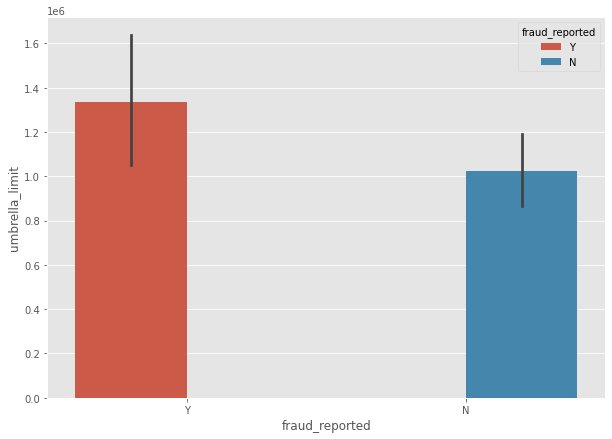

In [55]:
plt.figure(figsize=(10,7))
sns.barplot(x='fraud_reported',y='umbrella_limit',hue='fraud_reported',data=df)

### Observation:- Higher umbrella limit has high case of fraud claim rate

<AxesSubplot:xlabel='fraud_reported', ylabel='insured_zip'>

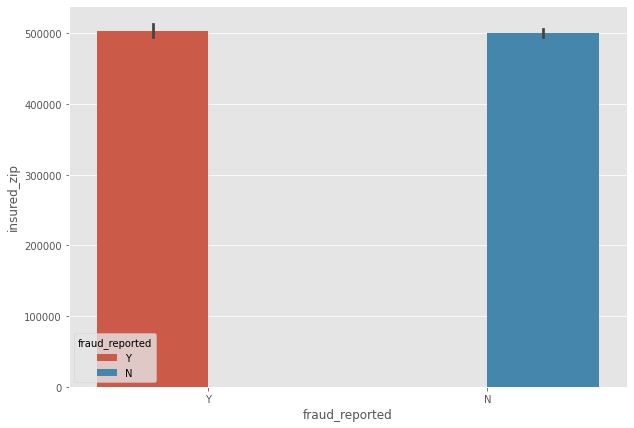

In [56]:
plt.figure(figsize=(10,7))
sns.barplot(x='fraud_reported',y='insured_zip',hue='fraud_reported',data=df)

### Observation:- Not much difference shows from insured_zip

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

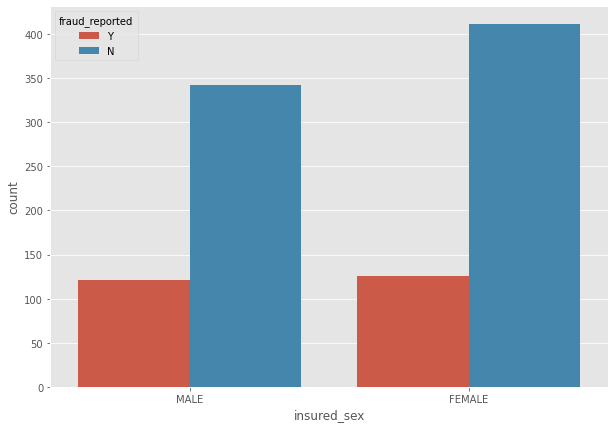

In [57]:
plt.figure(figsize=(10,7))
sns.countplot(x='insured_sex',hue='fraud_reported',data=df)

### Observation:- Compared to female male has high rate of fraud claim.

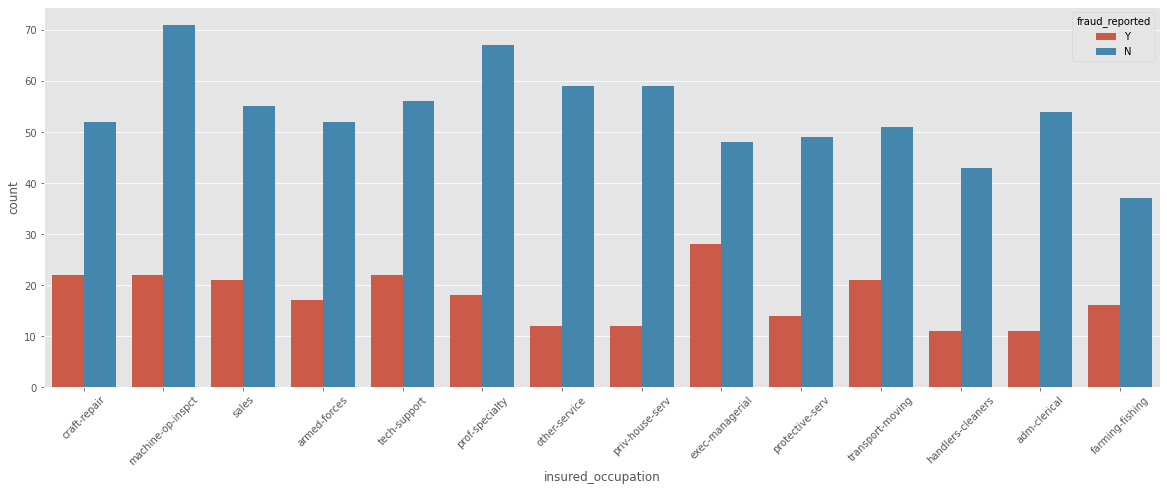

In [58]:
plt.figure(figsize=(20,7))
sns.countplot(x='insured_occupation',hue='fraud_reported',data=df)
plt.xticks(rotation=45)
plt.show()

# Observation:- Exec managrial seems to have reported more fraud claim.

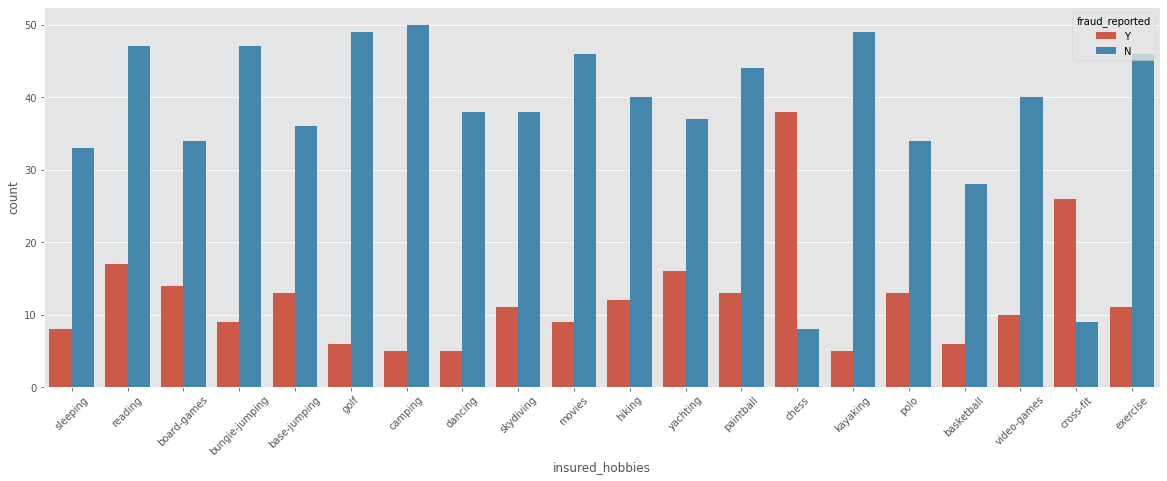

In [59]:
plt.figure(figsize=(20,7))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)
plt.xticks(rotation=45)
plt.show()

### Observation:- The person having hobbies of playing chess and cross-fit has high frequency of fraud-claim


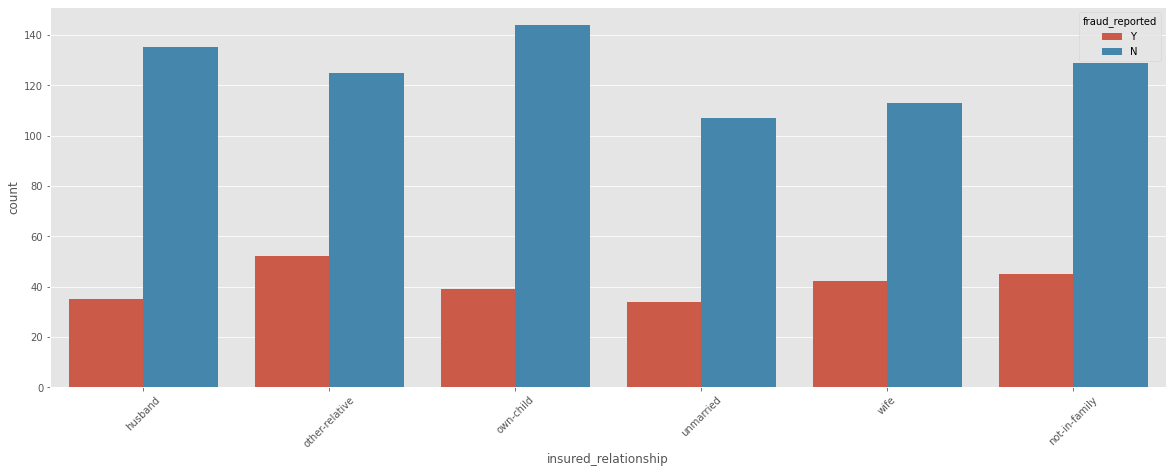

In [60]:
plt.figure(figsize=(20,7))
sns.countplot(x='insured_relationship',hue='fraud_reported',data=df)
plt.xticks(rotation=45)
plt.show()

### Observation:- Other relative has high fraud claim rate

In [61]:
plt.figure(figsize=(10,7))
sns.bareplot(x='fraud_reported',y='capital-gains',data=df)

AttributeError: module 'seaborn' has no attribute 'bareplot'

<Figure size 720x504 with 0 Axes>

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-loss'>

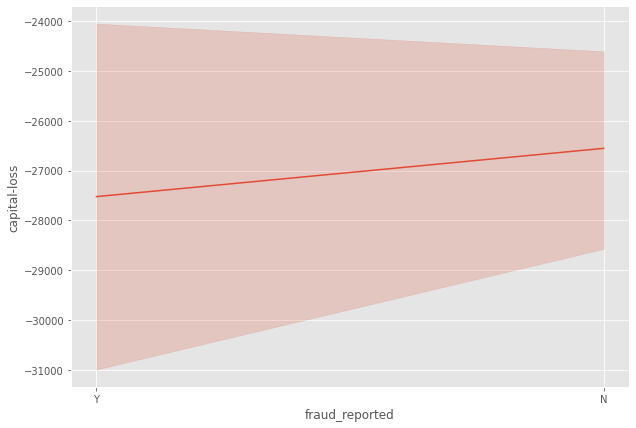

In [62]:
plt.figure(figsize=(10,7))
sns.lineplot(x='fraud_reported',y='capital-loss',data=df)

### Observation:- If the capital gain is more the frequency of fraud rate decreases and if the capital loss more then fraud rate increases.

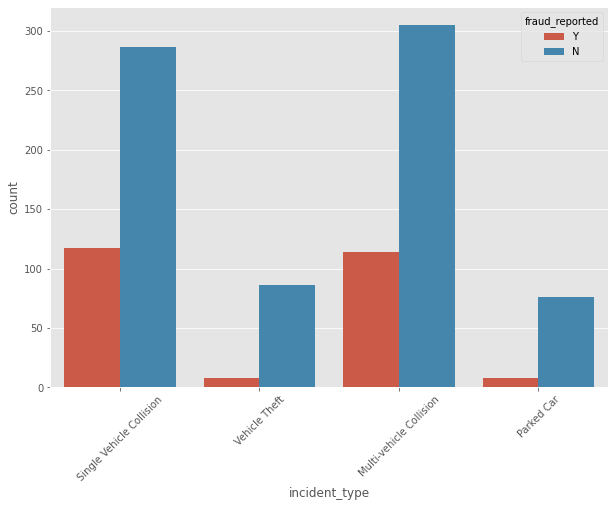

In [63]:
plt.figure(figsize=(10,7))
sns.countplot(x='incident_type',hue='fraud_reported',data=df)
plt.xticks(rotation=45)
plt.show()

### Observation:- Not much difference can be analysed from this graph

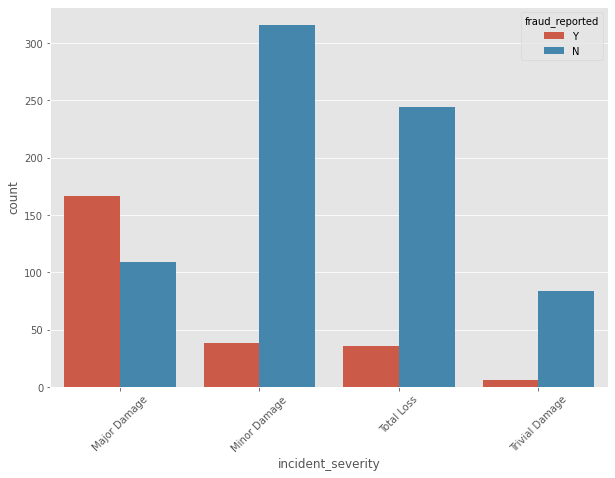

In [64]:
plt.figure(figsize=(10,7))
sns.countplot(x='incident_severity',hue='fraud_reported',data=df)
plt.xticks(rotation=45)
plt.show()

### Observation:- For major damage case the rate of fraud claim rate also increases

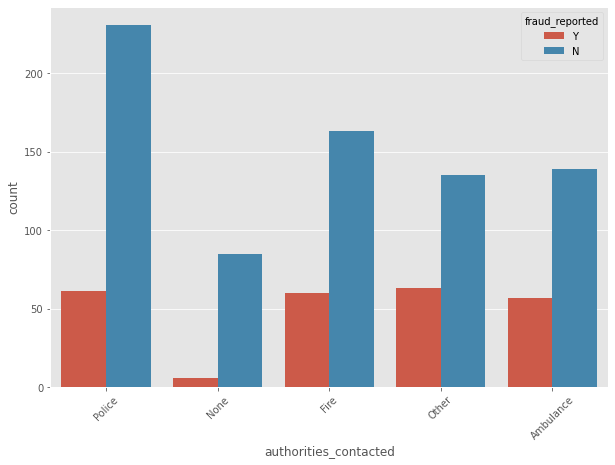

In [65]:
plt.figure(figsize=(10,7))
sns.countplot(x='authorities_contacted',hue='fraud_reported',data=df)
plt.xticks(rotation=45)
plt.show()

### Observation:- In case of fire other and ambulance the authority contacted having high rate of fraud insurance claim

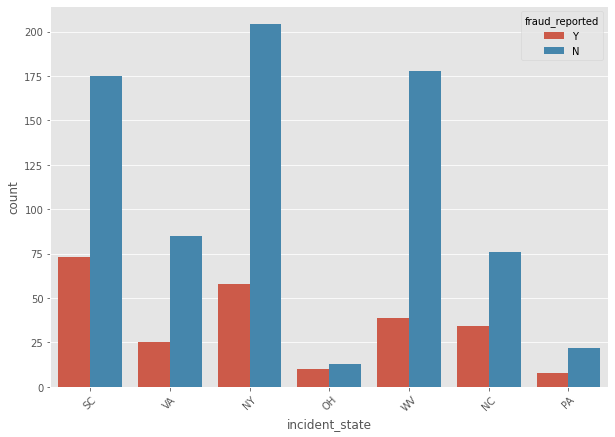

In [66]:
plt.figure(figsize=(10,7))
sns.countplot(x='incident_state',hue='fraud_reported',data=df)
plt.xticks(rotation=45)
plt.show()

### Observation:- The SC state has high rate of insurance fraud

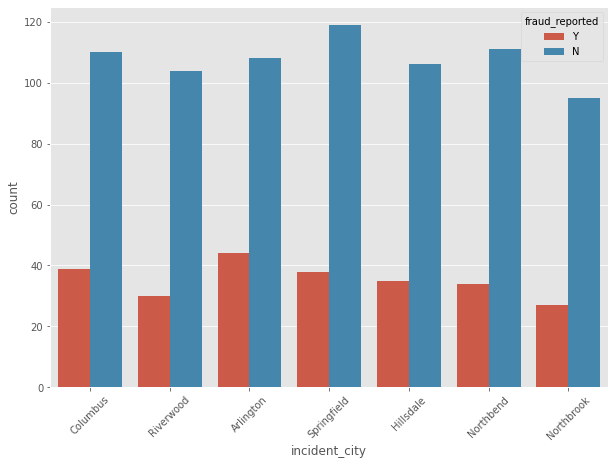

In [67]:
plt.figure(figsize=(10,7))
sns.countplot(x='incident_city',hue='fraud_reported',data=df)
plt.xticks(rotation=45)
plt.show()

### Observation:- Arlington city has high rate of insurance fraud claim rate than others.

<AxesSubplot:xlabel='fraud_reported', ylabel='incident_hour_of_the_day'>

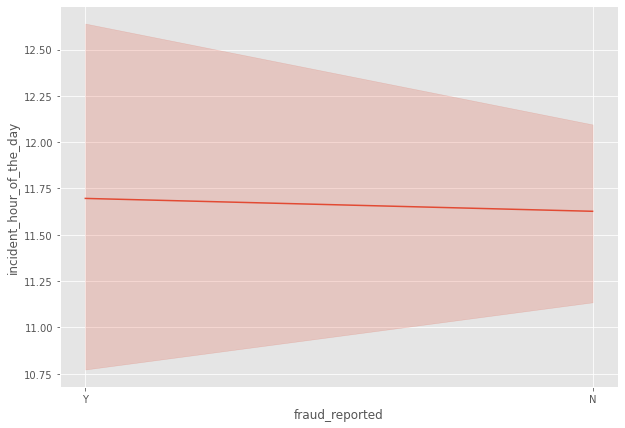

In [68]:
plt.figure(figsize=(10,7))
sns.lineplot(x='fraud_reported',y='incident_hour_of_the_day',data=df)

### Observation:- The plot does not show relation between fraud and actual claim

<AxesSubplot:xlabel='fraud_reported', ylabel='number_of_vehicles_involved'>

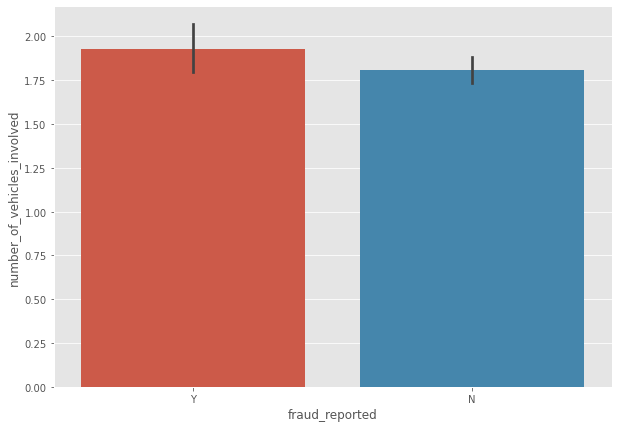

In [69]:
plt.figure(figsize=(10,7))
sns.barplot(x='fraud_reported',y='number_of_vehicles_involved',data=df)

### Observation:- The Number of vechile involved goes higher the fraud rate increases.

<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

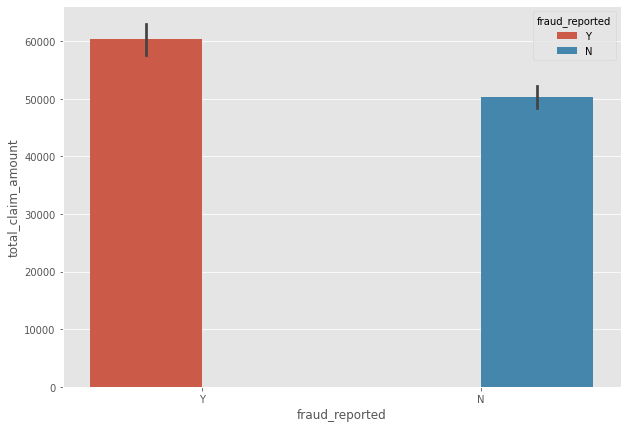

In [70]:
plt.figure(figsize=(10,7))
sns.barplot(x='fraud_reported',y='total_claim_amount',hue='fraud_reported',data=df)

### Observation:- If the claim amount increases the Fraud claim rate also increases

<AxesSubplot:xlabel='fraud_reported', ylabel='injury_claim'>

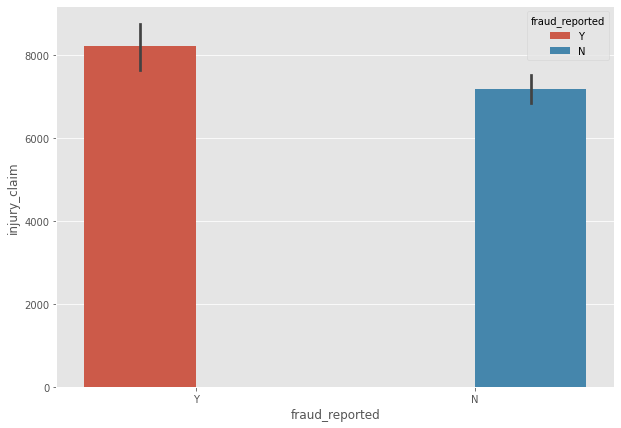

In [71]:
plt.figure(figsize=(10,7))
sns.barplot(x='fraud_reported',y='injury_claim',hue='fraud_reported',data=df)

### Observation:- The claim amount increases the fraud rate also increases

<AxesSubplot:xlabel='fraud_reported', ylabel='property_claim'>

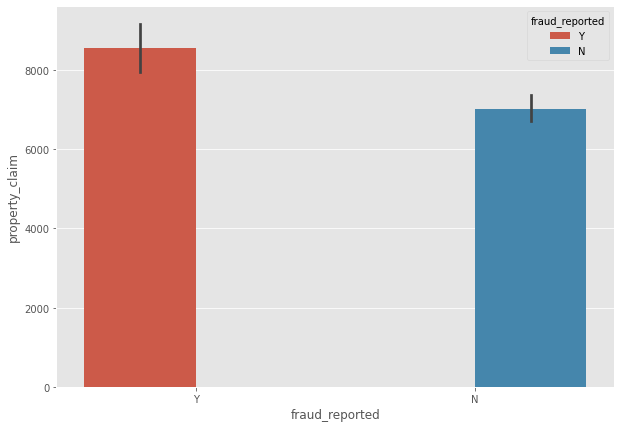

In [72]:
plt.figure(figsize=(10,7))
sns.barplot(x='fraud_reported',y='property_claim',hue='fraud_reported',data=df)

### Observation:- The property claim amount increases the claim rate also increases

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

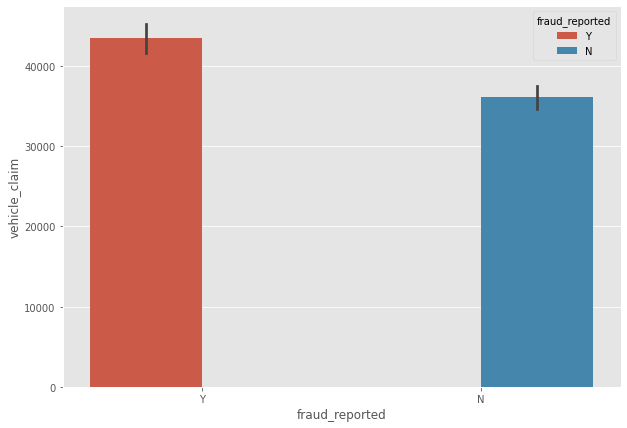

In [73]:
plt.figure(figsize=(10,7))
sns.barplot(x='fraud_reported',y='vehicle_claim',hue='fraud_reported',data=df)

### Observation:- Similarly the vehicle claim amount increases the fraud claim rate increases 

<AxesSubplot:xlabel='fraud_reported', ylabel='witnesses'>

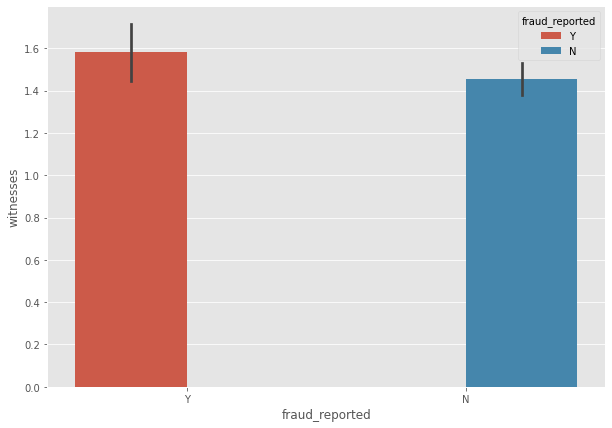

In [74]:
plt.figure(figsize=(10,7))
sns.barplot(x='fraud_reported',y='witnesses',hue='fraud_reported',data=df)

### Observation:- The number witness increases the fraud rate of claim increases

<AxesSubplot:xlabel='fraud_reported', ylabel='auto_year'>

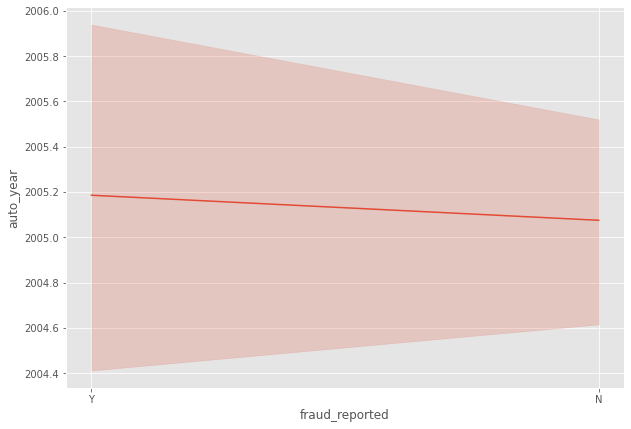

In [75]:
plt.figure(figsize=(10,7))
sns.lineplot(x='fraud_reported',y='auto_year',data=df)

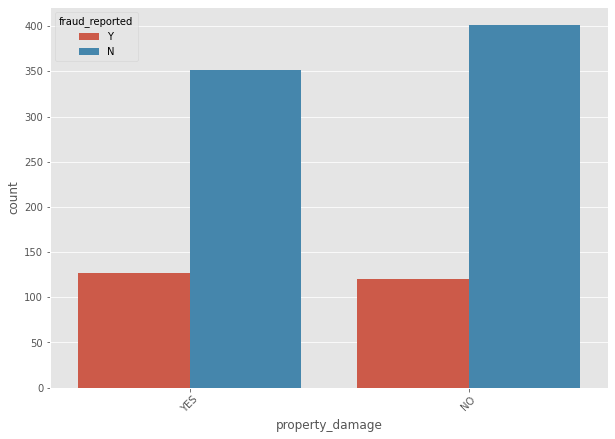

In [76]:
plt.figure(figsize=(10,7))
sns.countplot(x='property_damage',hue='fraud_reported',data=df)
plt.xticks(rotation=45)
plt.show()

### Observation:- The if property damage case is there, it has high chance of fraud claim rate

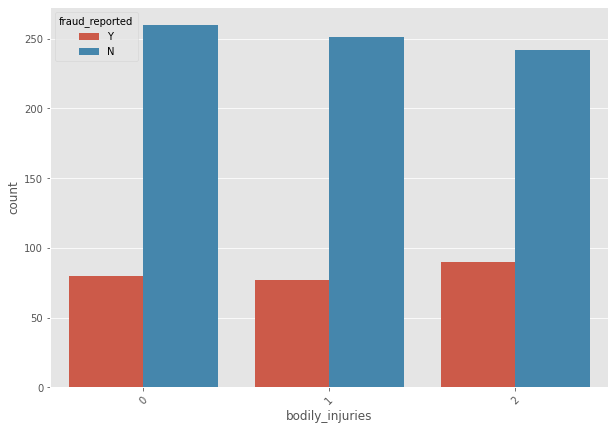

In [77]:
plt.figure(figsize=(10,7))
sns.countplot(x='bodily_injuries',hue='fraud_reported',data=df)
plt.xticks(rotation=45)
plt.show()

### Observation:-If the value of 2 bodily injured the fraud claim rate also increases

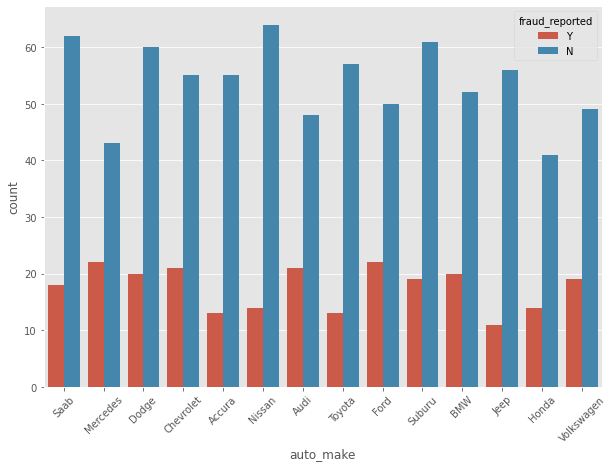

In [78]:
plt.figure(figsize=(10,7))
sns.countplot(x='auto_make',hue='fraud_reported',data=df)
plt.xticks(rotation=45)
plt.show()

### Observation:- The graph shows Mercedes,chevrolet,Audi,Ford having high fraud claim rate

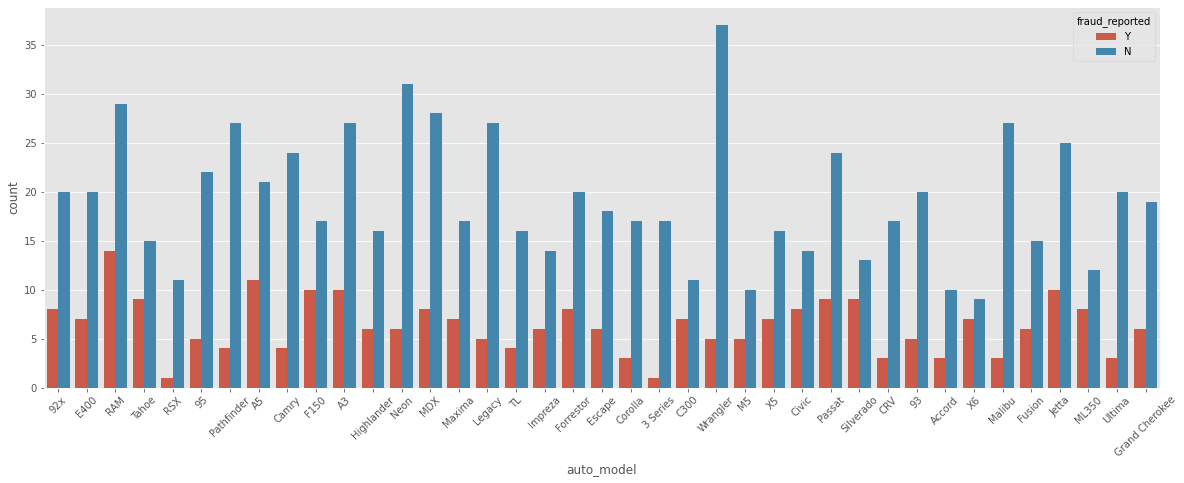

In [79]:
plt.figure(figsize=(20,7))
sns.countplot(x='auto_model',hue='fraud_reported',data=df)
plt.xticks(rotation=45)
plt.show()

### Observation:- RAM model has high rate of fraud

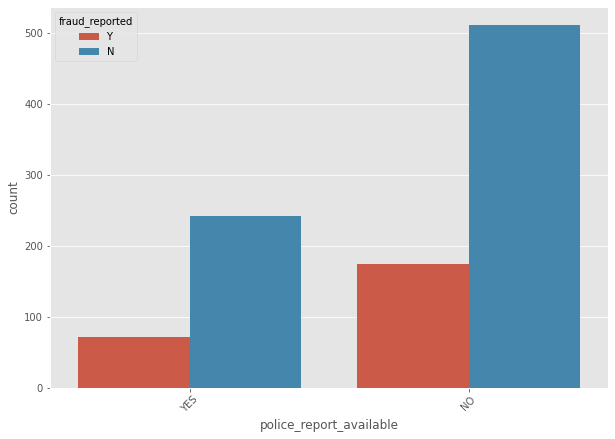

In [80]:
plt.figure(figsize=(10,7))
sns.countplot(x='police_report_available',hue='fraud_reported',data=df)
plt.xticks(rotation=45)
plt.show()

### Observation:- The police report does not show any significance difference

In [81]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


# Feature Engineering

In [82]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [83]:
from sklearn.preprocessing import LabelEncoder

In [84]:
le=LabelEncoder()

In [85]:
df.drop(columns=['incident_date','auto_year','incident_location'],axis=1,inplace=True)

In [86]:
df.drop('auto_model',axis=1,inplace=True)

In [87]:
df[['fraud_reported','police_report_available','property_damage','incident_city','incident_state','authorities_contacted',
    'incident_severity','collision_type','incident_type','insured_relationship','insured_hobbies','insured_occupation','insured_education_level',
   'insured_sex','policy_csl','policy_state','auto_make']]=df[['fraud_reported','police_report_available','property_damage','incident_city','incident_state','authorities_contacted',
    'incident_severity','collision_type','incident_type','insured_relationship','insured_hobbies','insured_occupation','insured_education_level',
   'insured_sex','policy_csl','policy_state','auto_make']].apply(le.fit_transform)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int64  
 3   policy_csl                   1000 non-null   int64  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   int64  
 9   insured_education_level      1000 non-null   int64  
 10  insured_occupation           1000 non-null   int64  
 11  insured_hobbies              1000 non-null   int64  
 12  insured_relationship         1000 non-null   int64  
 13  capital-gains      

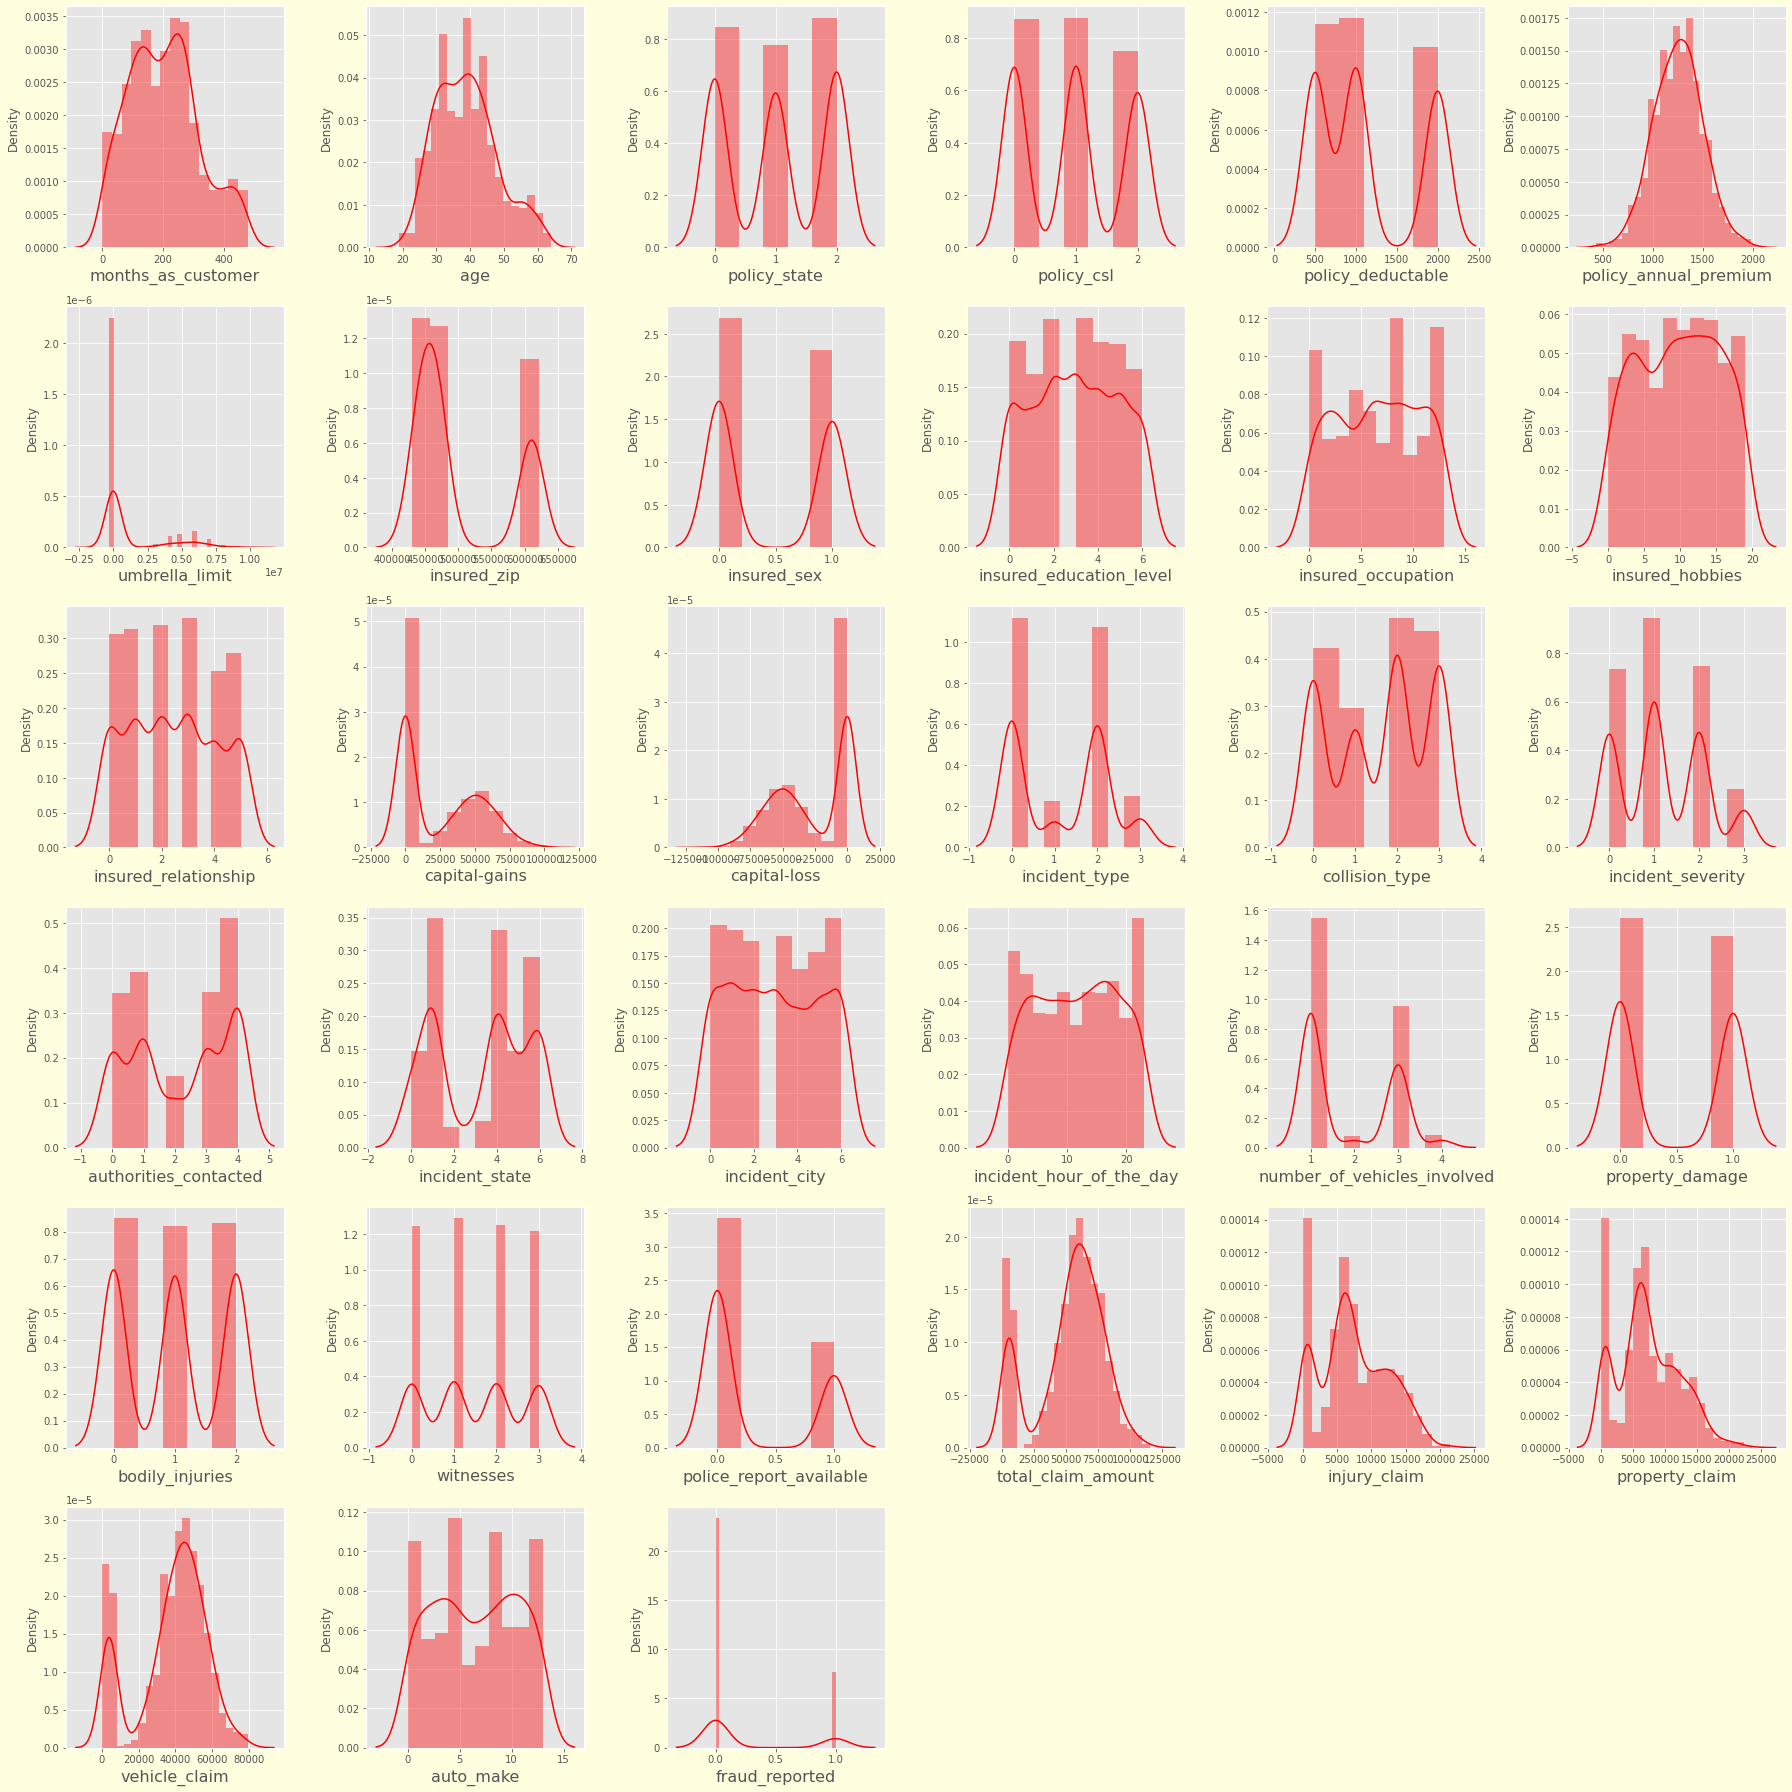

In [89]:
plt.figure(figsize=(25,25),facecolor='lightyellow')

plotnumber=1
for column in df:
    if plotnumber <= 36:
        ax=plt.subplot(6,6,plotnumber)
        sns.distplot(df[column],kde=True,color='red')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()

### Observation:- Clearly some skewness is there 

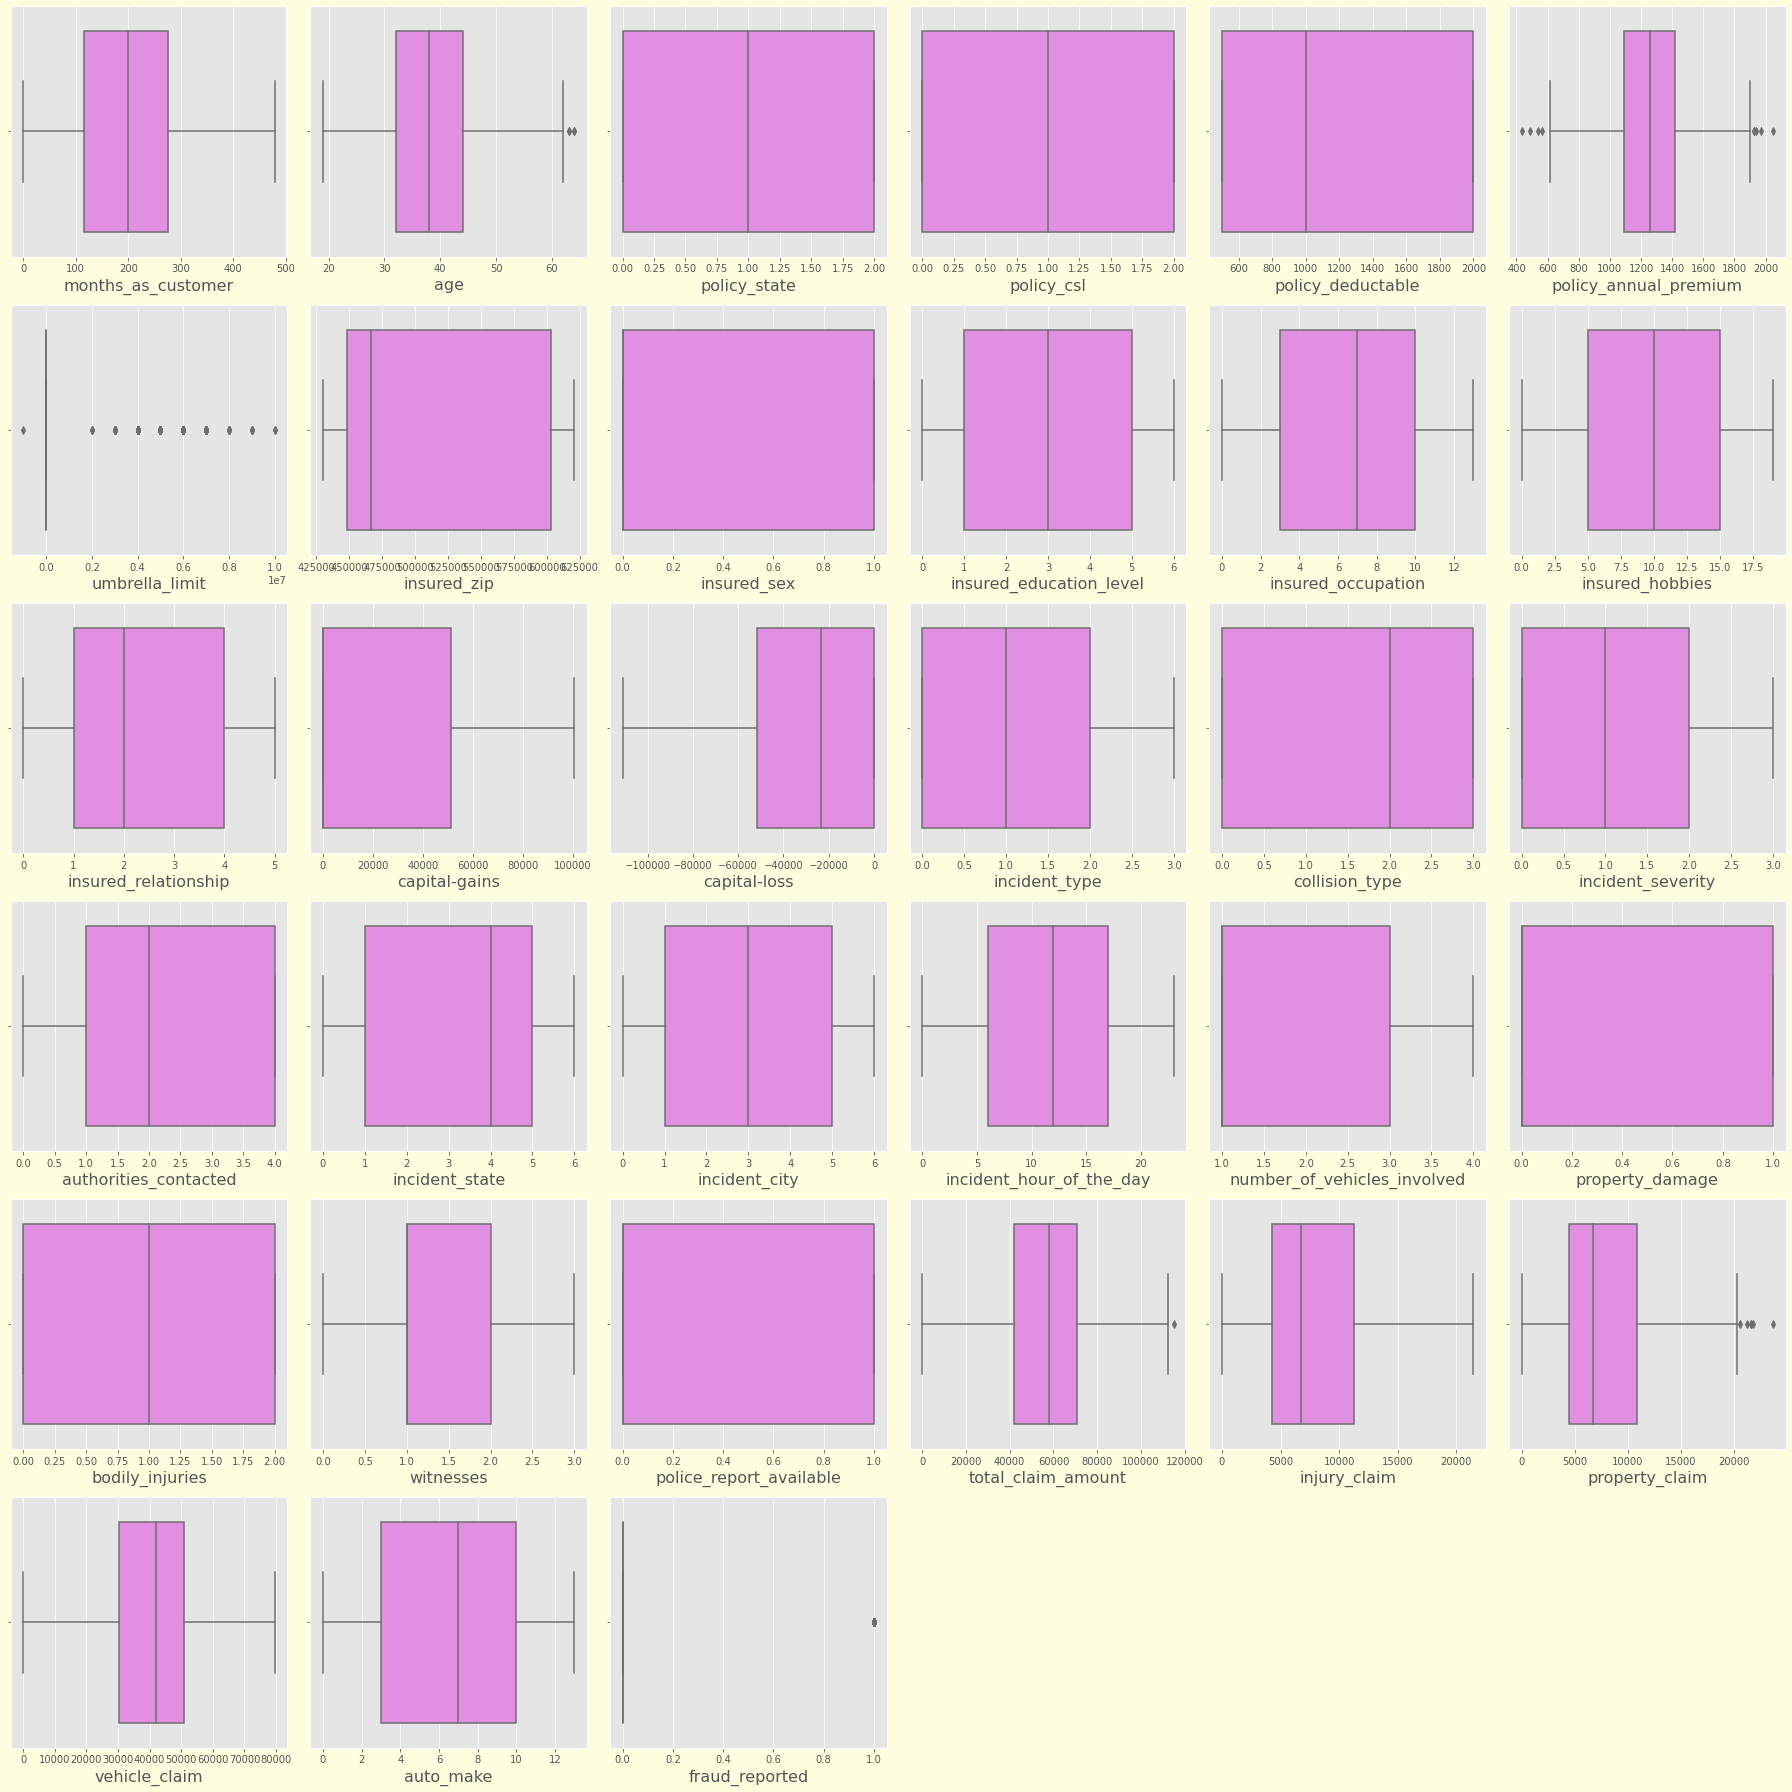

In [90]:
plt.figure(figsize=(25,25),facecolor='lightyellow')

plotnumber=1
for column in df:
    if plotnumber <= 36:
        ax=plt.subplot(6,6,plotnumber)
        sns.boxplot(df[column],color='violet')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()

In [91]:
# We will remove outlier through zscore.
from scipy.stats import zscore
df.shape

(1000, 33)

In [92]:
df=df[np.abs(zscore(df)<3).all(axis=1)]

In [93]:
df.shape

(983, 33)

In [94]:
percent_loss=print((17/1000)*100)

1.7000000000000002


### Just 1.7 percent data loss through zscore

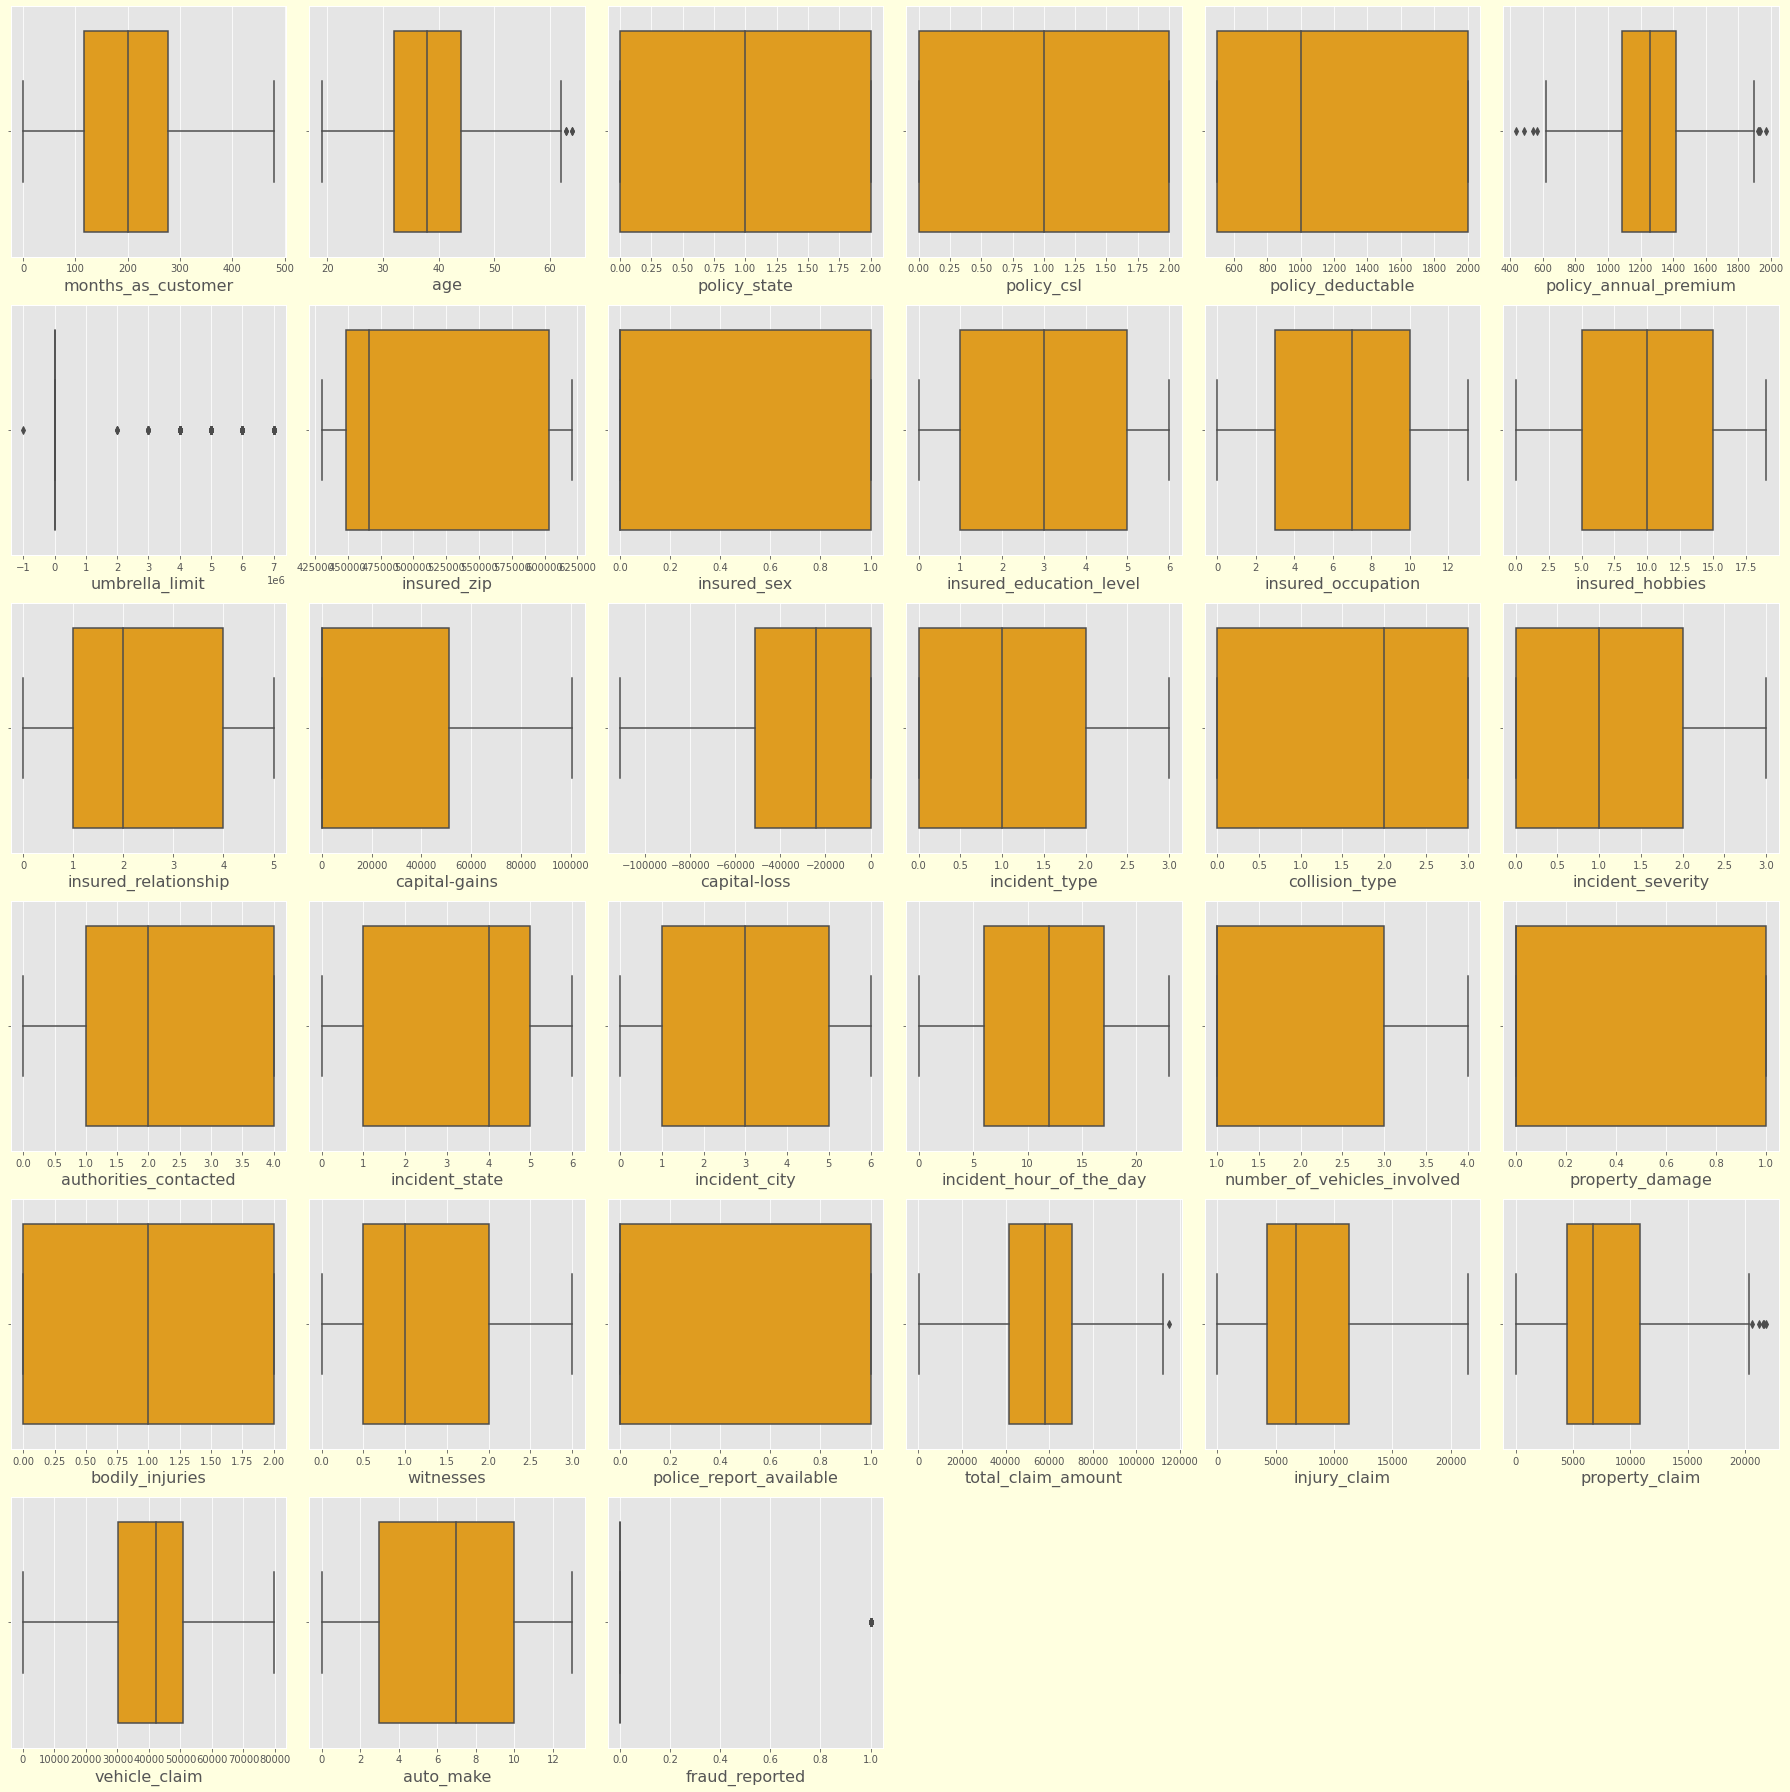

In [95]:
plt.figure(figsize=(25,25),facecolor='lightyellow')

plotnumber=1
for column in df:
    if plotnumber <= 36:
        ax=plt.subplot(6,6,plotnumber)
        sns.boxplot(df[column],color='orange')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()

In [96]:
df.skew()

months_as_customer             0.366303
age                            0.478261
policy_state                  -0.036113
policy_csl                     0.096017
policy_deductable              0.475798
policy_annual_premium         -0.017987
umbrella_limit                 1.806345
insured_zip                    0.831511
insured_sex                    0.140949
insured_education_level        0.006218
insured_occupation            -0.056178
insured_hobbies               -0.061328
insured_relationship           0.075774
capital-gains                  0.466842
capital-loss                  -0.389587
incident_type                  0.094891
collision_type                -0.176234
incident_severity              0.280436
authorities_contacted         -0.110122
incident_state                -0.149207
incident_city                  0.045063
incident_hour_of_the_day      -0.034787
number_of_vehicles_involved    0.505944
property_damage                0.083618
bodily_injuries                0.005622


### Observation:- Skewness in some of the features found.

In [97]:
# Lets Separate target and features 
X=df.drop('fraud_reported',axis=1)
y=df.fraud_reported

In [98]:
from sklearn.preprocessing import PowerTransformer

In [99]:
pt=PowerTransformer(method='yeo-johnson')

In [100]:
X=pd.DataFrame(pt.fit_transform(X),columns=X.columns)

In [101]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,y=sm.fit_resample(X,y)


In [102]:
X.skew()

months_as_customer            -0.124107
age                            0.019184
policy_state                  -0.226075
policy_csl                    -0.116211
policy_deductable              0.016594
policy_annual_premium         -0.003025
umbrella_limit                -6.876498
insured_zip                    0.000000
insured_sex                    0.086070
insured_education_level       -0.184908
insured_occupation            -0.177045
insured_hobbies               -0.156364
insured_relationship          -0.215197
capital-gains                  0.081878
capital-loss                   0.046059
incident_type                 -0.154506
collision_type                -0.321436
incident_severity              0.274308
authorities_contacted         -0.167905
incident_state                -0.251643
incident_city                 -0.197736
incident_hour_of_the_day      -0.312574
number_of_vehicles_involved    0.378241
property_damage                0.037385
bodily_injuries               -0.167385


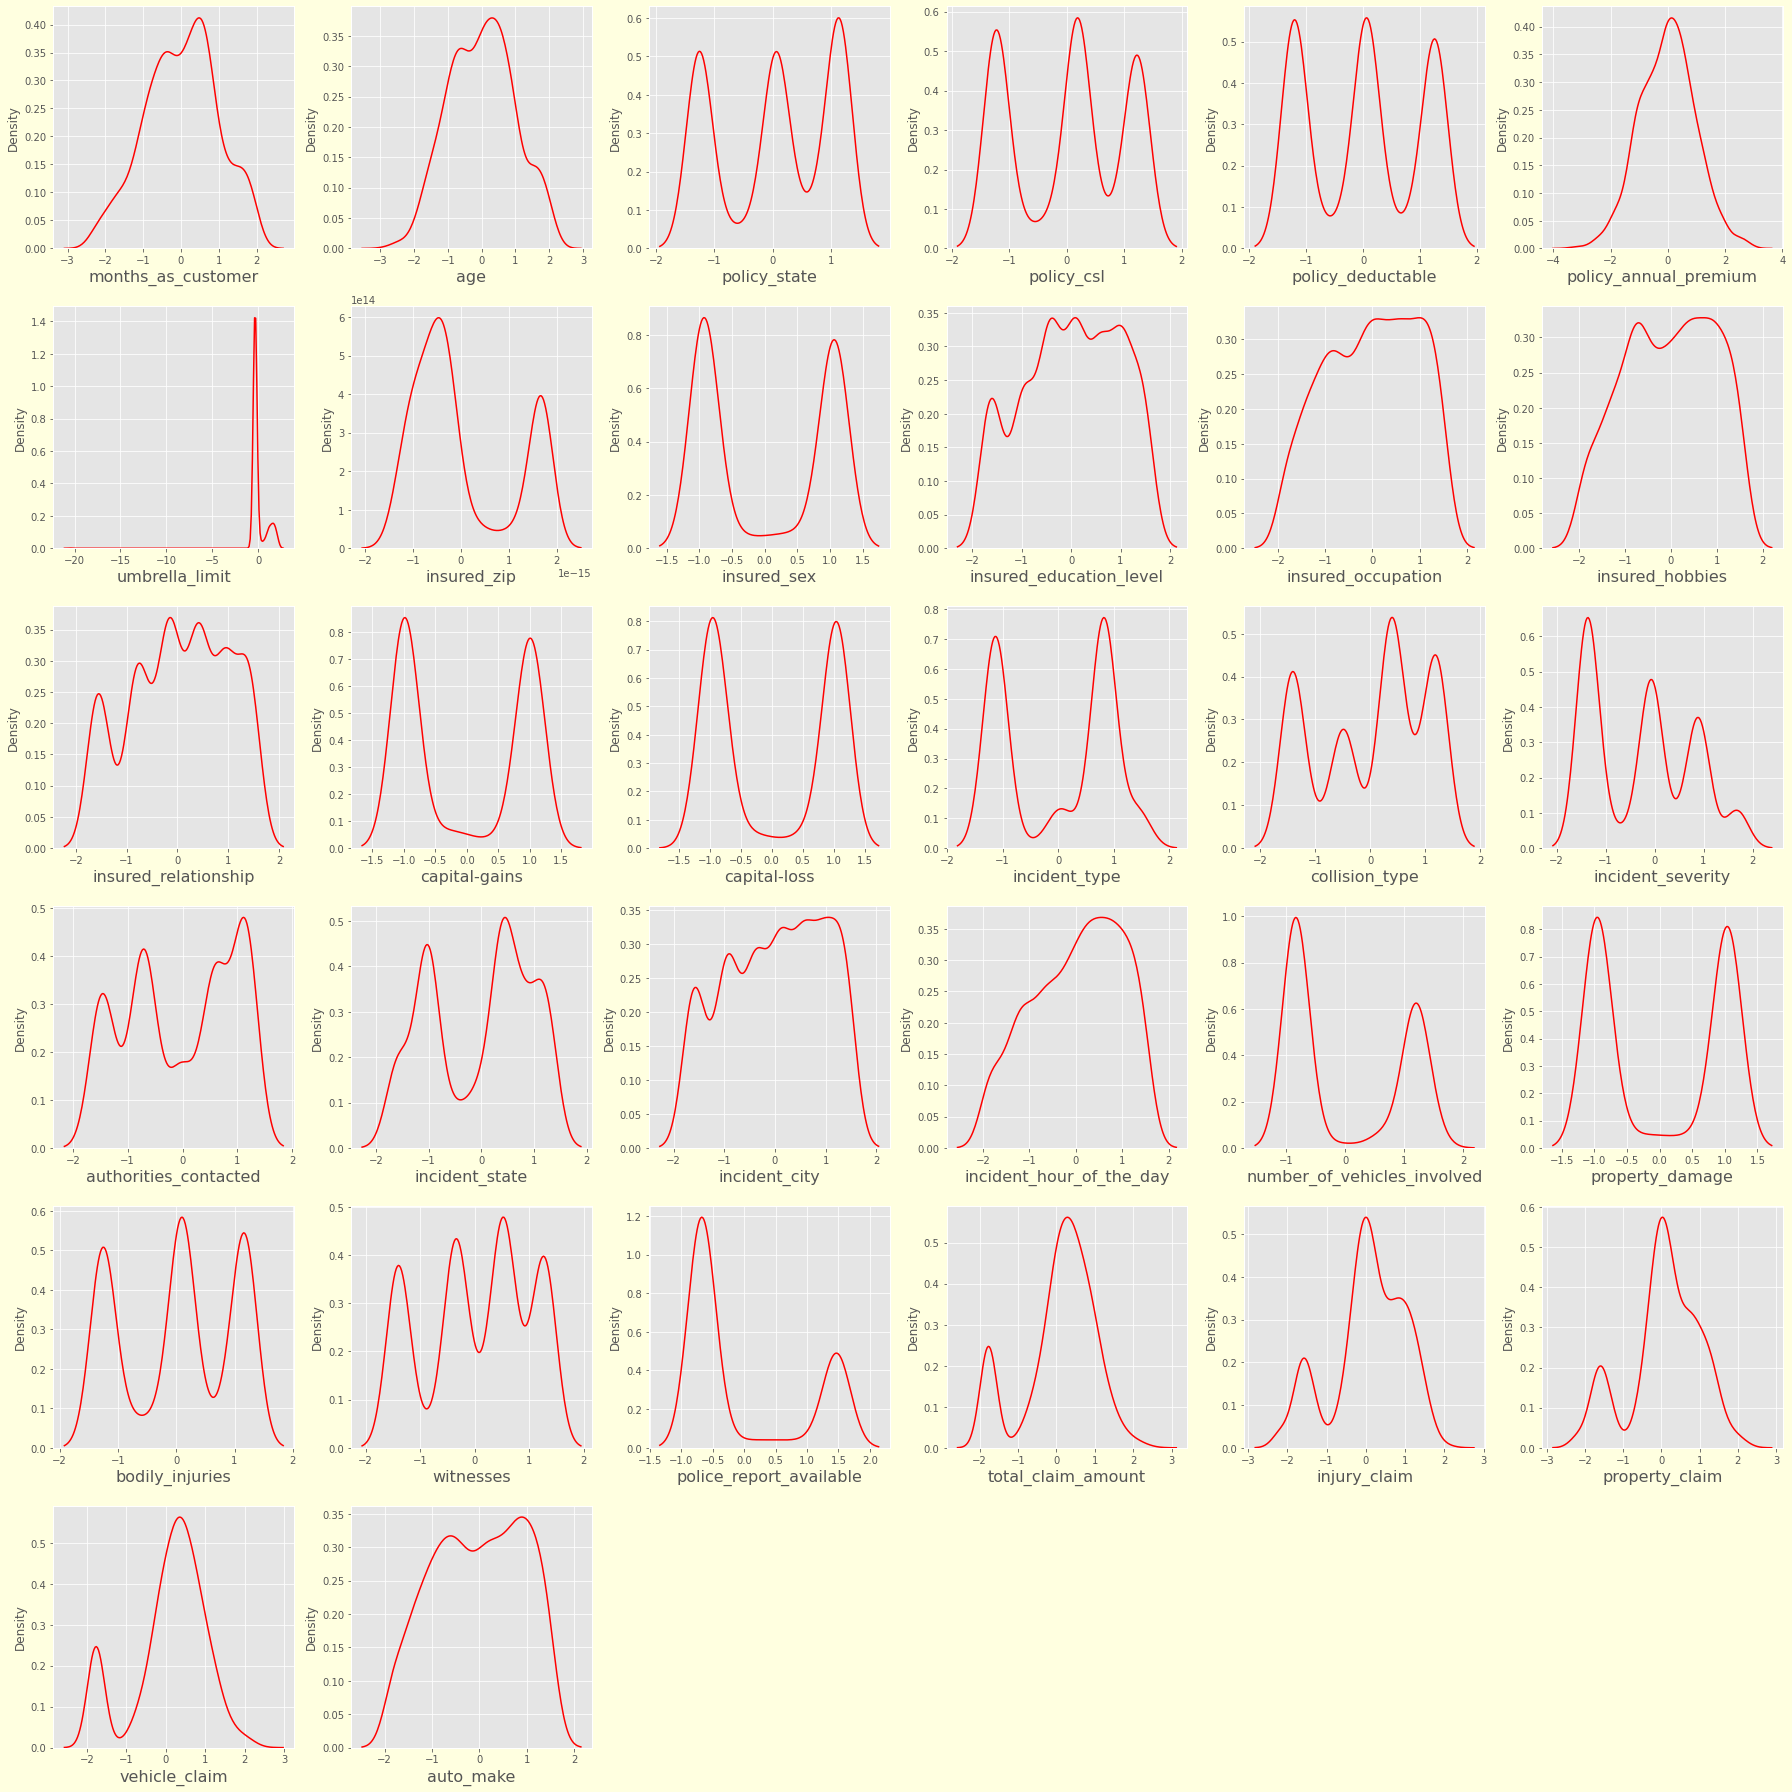

In [103]:
plt.figure(figsize=(25,25),facecolor='lightyellow')

plotnumber=1
for column in X:
    if plotnumber <= 36:
        ax=plt.subplot(6,6,plotnumber)
        sns.kdeplot(X[column],color='red')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()

<AxesSubplot:>

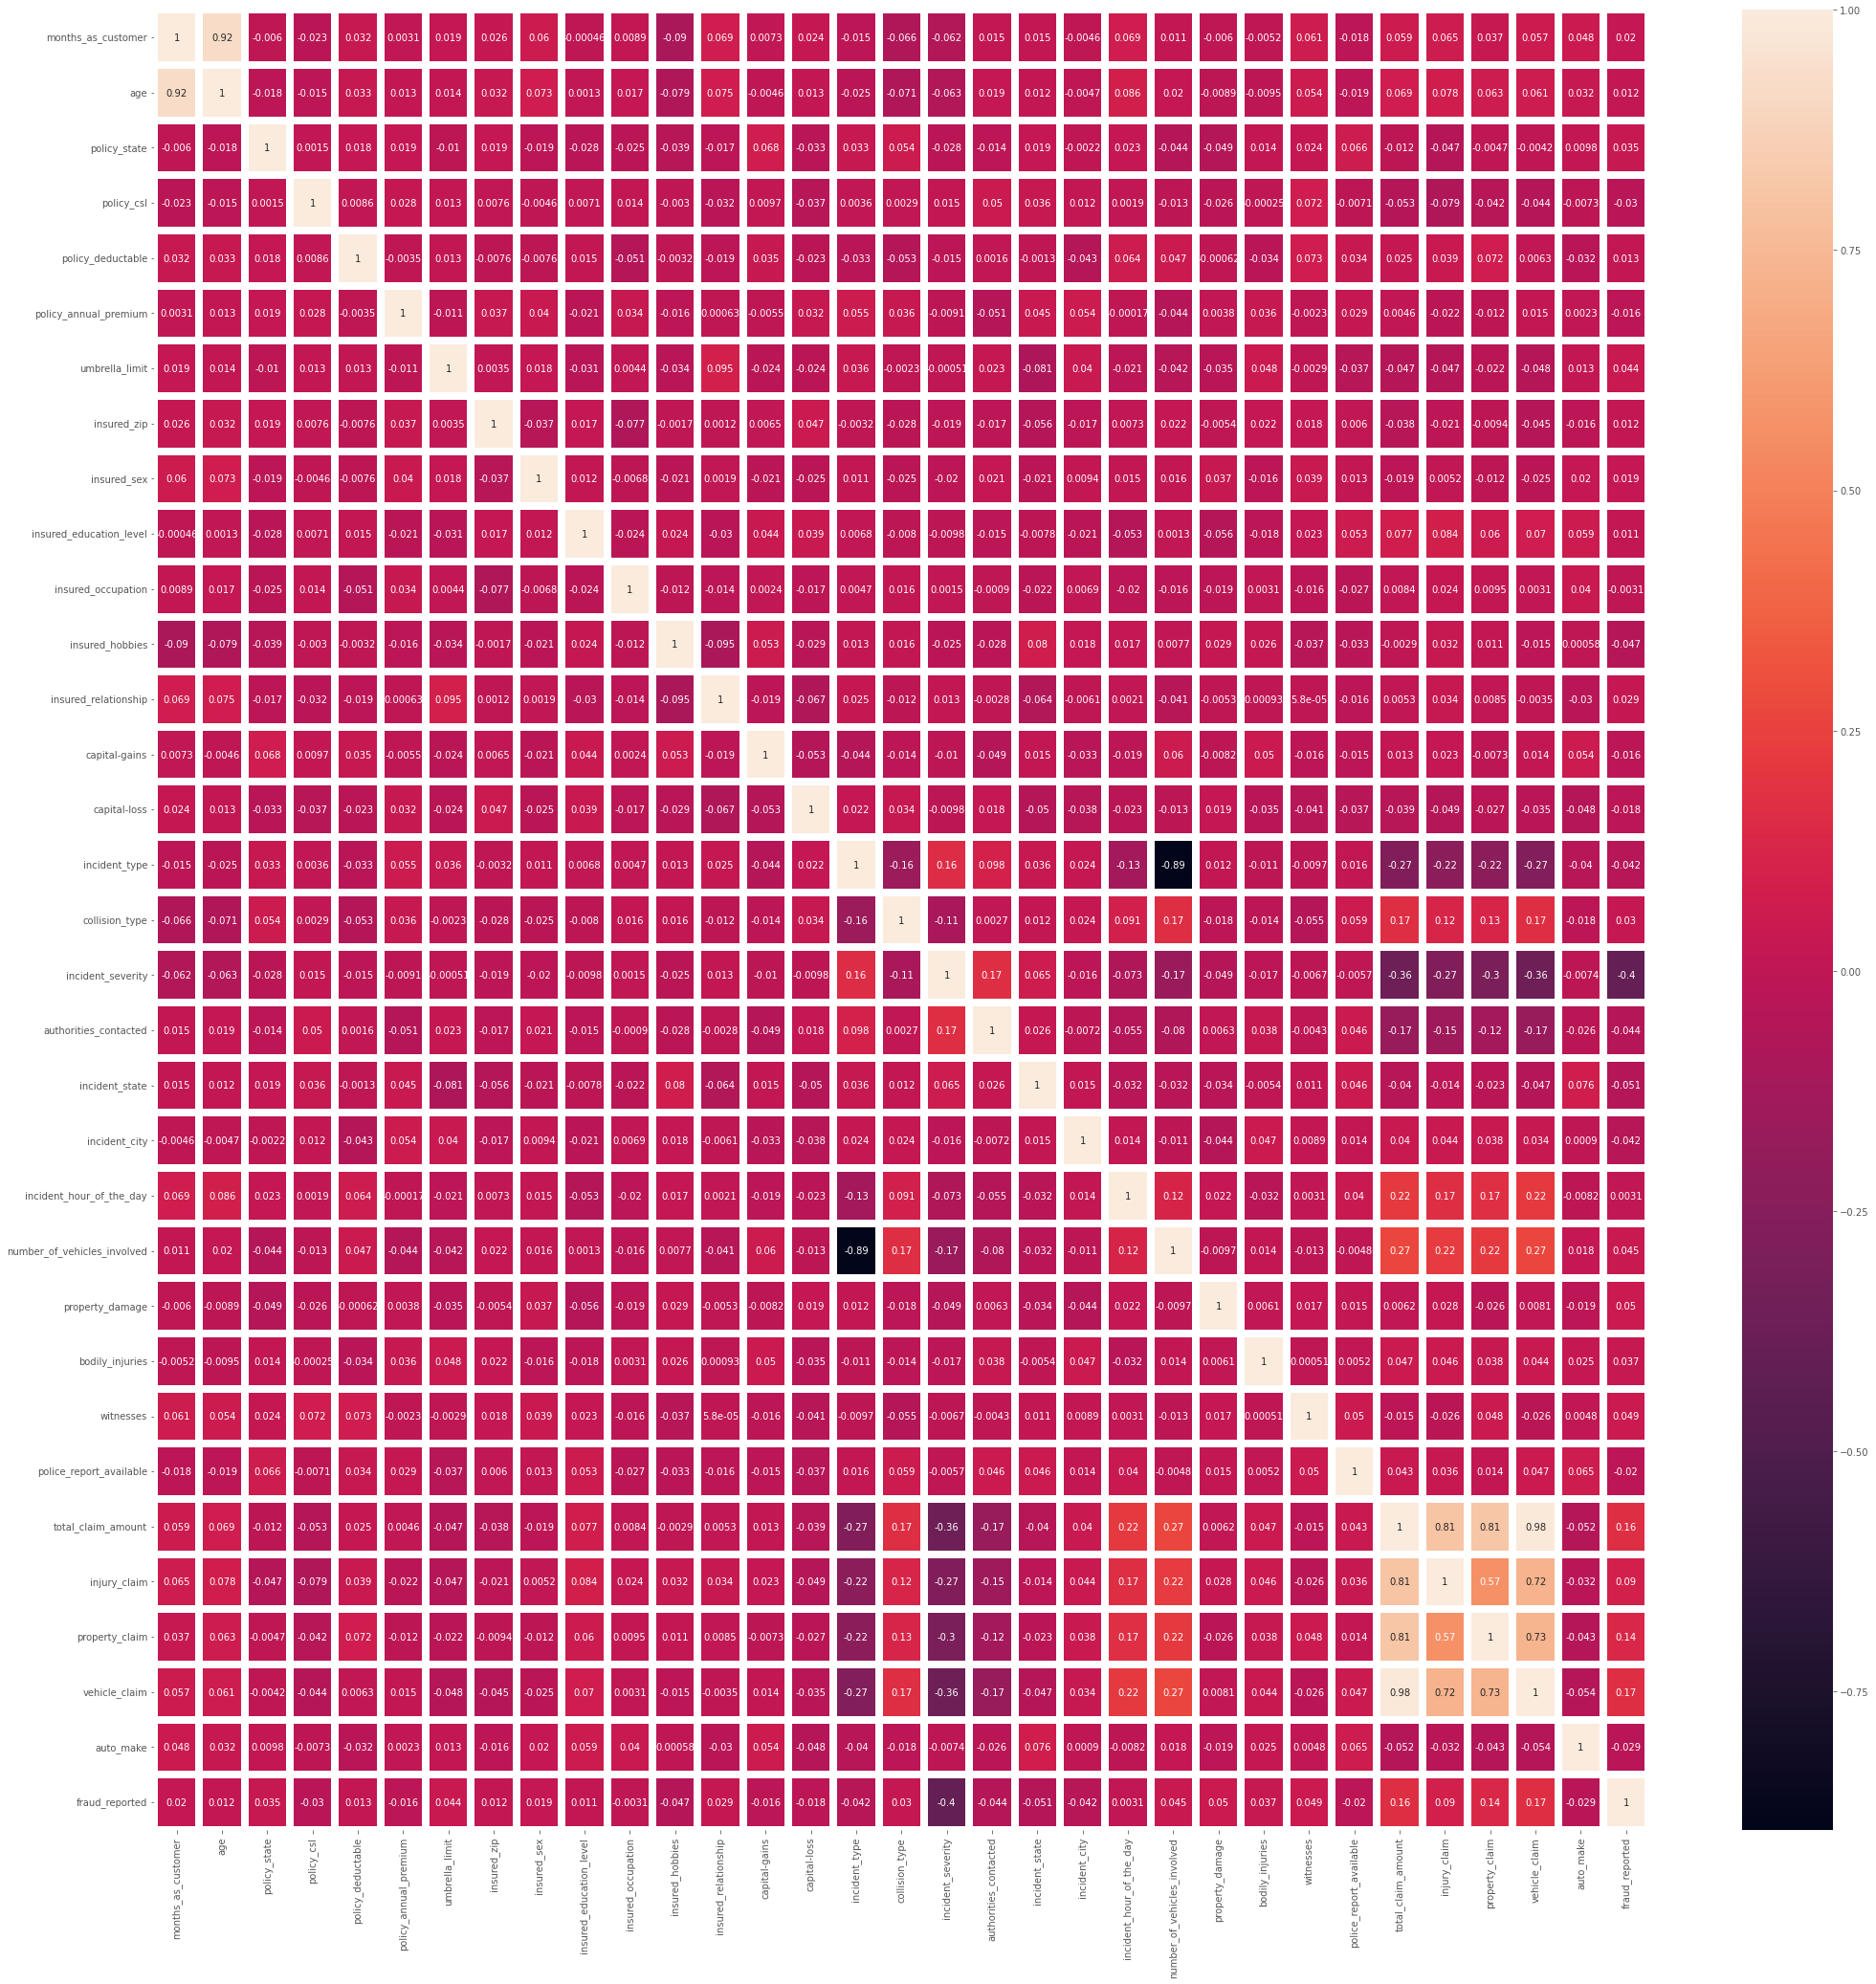

In [104]:
plt.figure(figsize=(35,35))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10},linewidths=8)

<AxesSubplot:title={'center':'Correlation with Target'}>

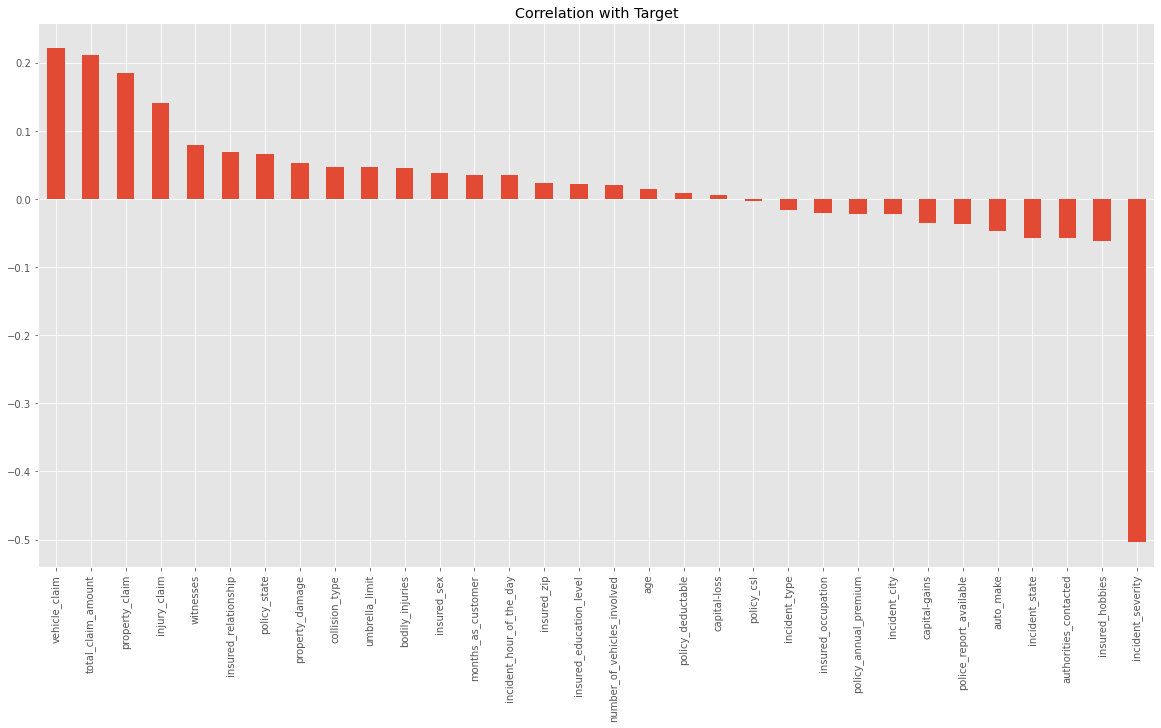

In [105]:
plt.figure(figsize=(20,10))
X.corrwith(y).sort_values(ascending=False).plot(kind='bar',grid=True,title='Correlation with Target')

## Observation:- Some features dont have any relation with target. By performing PCA we can overcome this

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

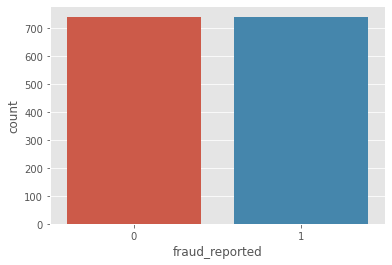

In [106]:
sns.countplot(y)

In [107]:
from sklearn.preprocessing import StandardScaler


In [108]:
scaler=StandardScaler()
x=scaler.fit_transform(X)

In [109]:
x

array([[ 1.06420352,  1.02573553,  1.14804361, ...,  1.0764095 ,
         0.70179567,  0.93102876],
       [ 0.28728746,  0.4331072 ,  0.01885402, ..., -1.77727327,
        -2.04438042,  0.46426634],
       [-0.5626337 , -1.18000436,  1.14804361, ..., -0.72180448,
        -1.00061966, -0.56488055],
       ...,
       [ 0.42622849,  0.71827306, -1.24085607, ..., -0.16330658,
        -0.23958515,  1.37594519],
       [ 0.28779862,  0.17773996, -1.24141908, ...,  1.312844  ,
         1.05702304,  0.13646402],
       [ 1.75389124,  1.77921365,  0.71154531, ...,  0.3297992 ,
         0.30036165, -0.04478127]])

In [110]:
from sklearn.decomposition import PCA
pca=PCA()

In [111]:
pca.fit_transform(x)

array([[-8.25040718e-01,  1.43274214e+00, -6.76652233e-01, ...,
         4.85788352e-02,  5.74129148e-02,  1.59466374e-03],
       [ 4.30700665e+00,  5.72732988e-01, -2.24876429e-01, ...,
         1.25268993e-01, -4.10806946e-01,  3.80558182e-02],
       [ 8.46126398e-01, -1.45149555e+00,  1.54206460e+00, ...,
        -4.49550822e-01, -1.12877427e-01, -4.24602603e-02],
       ...,
       [-1.17836610e+00,  3.51698450e-01,  1.83929073e+00, ...,
         1.42159866e-01, -5.15959289e-02,  9.48161054e-03],
       [-3.10756936e+00,  4.53732800e-01,  9.51236018e-01, ...,
        -1.80412424e-01,  7.39521103e-03,  9.48003037e-02],
       [ 2.92739788e-01,  3.18046311e+00,  9.14411342e-02, ...,
         1.64156042e-02, -4.12713215e-02, -5.83635451e-02]])

Text(0.5, 1.0, 'PCA')

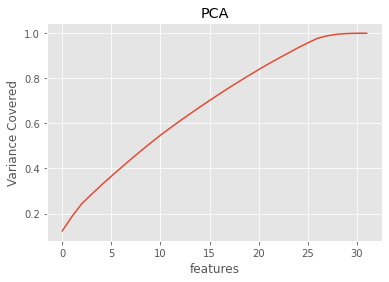

In [112]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('features')
plt.ylabel('Variance Covered')
plt.title('PCA')

# Observation:- Since 27 components explained maximum variance of dataset so we can assume 27 components to give best result

In [113]:
pca=PCA(n_components=27)
pcomp=pca.fit_transform(x)
pc=pd.DataFrame(pcomp,columns=['PC'+str(i) for i in range(1,28)])

In [114]:
pc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
0,-0.825041,1.432742,-0.676652,1.209296,1.270667,1.390366,1.393037,-0.829848,0.882994,1.403168,...,-0.114663,-0.804943,-0.780677,-0.134520,0.441708,-1.030157,-0.977820,0.237320,-0.858927,-0.005760
1,4.307007,0.572733,-0.224876,-0.307915,-0.087557,0.234368,0.121791,-0.541462,1.221806,0.563684,...,-1.784759,-0.725509,-0.630511,-0.033335,0.505808,0.423881,0.616261,-1.379613,0.515069,-0.527604
2,0.846126,-1.451496,1.542065,-0.771120,-0.191506,-1.839649,-0.018103,-0.846071,-2.188977,0.107698,...,0.224305,0.752117,-2.461086,1.782550,0.007277,0.090015,0.197762,-0.347885,-1.285354,0.872801
3,0.338904,1.589187,-0.077237,-0.910736,0.953451,0.435863,-1.293573,-2.572906,-2.182951,-1.141758,...,-0.001421,-0.498432,0.705631,-0.624483,0.048501,-1.150510,0.015188,-0.154885,-0.823384,2.029079
4,3.822419,1.601659,0.572733,-1.147235,-0.118732,-0.768027,-1.385397,1.996743,-0.171059,-2.109827,...,0.595724,-1.242965,0.881584,-1.098285,-1.418000,0.185954,-1.631418,-0.055058,0.524606,1.757698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,-0.561124,0.480648,-1.591732,-0.792597,0.350689,1.540017,0.644339,-0.345048,-0.205829,1.586382,...,-0.090139,1.623647,0.528481,-0.402731,-0.178858,0.777095,-1.427681,-0.404806,-1.009674,-0.738032
1480,-3.311686,-0.130101,0.133756,-0.620858,-2.543643,-0.947730,-0.486094,-0.325493,-0.747088,0.203991,...,0.462264,1.014568,-1.467958,-0.130869,-0.596071,-1.521213,-0.046282,-1.457620,-0.142013,0.205371
1481,-1.178366,0.351698,1.839291,0.052984,-1.529178,-0.533608,0.626588,-0.303703,0.871422,-1.049129,...,-0.405457,-0.912260,-0.026107,1.547263,-0.376153,-1.478029,-0.697422,0.523024,-0.456850,0.769388
1482,-3.107569,0.453733,0.951236,0.831907,-1.491527,0.234428,-0.775762,-0.193846,0.204686,-0.700843,...,0.338644,-1.084407,1.419310,-0.083832,0.971299,0.989837,0.263263,-0.073504,-0.109779,0.754936


In [115]:
## Model building

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,plot_roc_curve

In [116]:
# Logistic Regression
lr=LogisticRegression()

In [117]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(pc,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    ypred=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    if round(accuracy_score(y_train,ypred)*100)==round(accuracy_score(y_test,y_pred)*100):
        print('At random state',i,'model performs well')
        print('At random state ',i)
        print(round(accuracy_score(y_test,y_pred)*100))
        

At random state 3 model performs well
At random state  3
75
At random state 4 model performs well
At random state  4
76
At random state 6 model performs well
At random state  6
75
At random state 34 model performs well
At random state  34
76
At random state 38 model performs well
At random state  38
75
At random state 59 model performs well
At random state  59
75
At random state 84 model performs well
At random state  84
76
At random state 106 model performs well
At random state  106
75
At random state 113 model performs well
At random state  113
76
At random state 118 model performs well
At random state  118
75
At random state 119 model performs well
At random state  119
75
At random state 121 model performs well
At random state  121
76
At random state 142 model performs well
At random state  142
74
At random state 146 model performs well
At random state  146
76
At random state 156 model performs well
At random state  156
75
At random state 158 model performs well
At random state  158

At random state 968 model performs well
At random state  968
75


<AxesSubplot:>

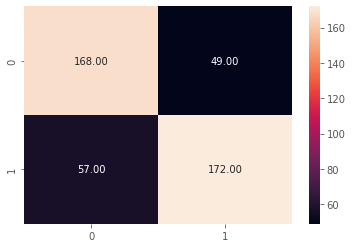

In [118]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,annot_kws={'size':10},fmt='.2f')

In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       217
           1       0.78      0.75      0.76       229

    accuracy                           0.76       446
   macro avg       0.76      0.76      0.76       446
weighted avg       0.76      0.76      0.76       446



In [120]:
from sklearn.model_selection import cross_val_score

In [121]:
cross_val_score(lr,pc,y,cv=5).mean()

0.7486759486759487

In [149]:
x_train,x_test,y_train,y_test=train_test_split(pc,y,test_size=0.30,random_state=432)

In [150]:
def model(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        ypred=clf.predict(x_train)
        print(accuracy_score(y_train,ypred)*100)
    elif train==False:
        y_pred=clf.predict(x_test)
        print(accuracy_score(y_test,y_pred)*100)
        print(classification_report(y_test,y_pred))
        sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,annot_kws={'size':10},fmt='.2f')
        print('*'*100)
        print('cross_val_score',cross_val_score(clf,pc,y,cv=5).mean())
        

# KNN

In [151]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [152]:
model(knn,x_train,x_test,y_train,y_test,train=True)

78.22736030828517


67.04035874439462
              precision    recall  f1-score   support

           0       0.90      0.39      0.55       226
           1       0.61      0.95      0.74       220

    accuracy                           0.67       446
   macro avg       0.75      0.67      0.64       446
weighted avg       0.75      0.67      0.64       446

****************************************************************************************************
cross_val_score 0.7055487305487306


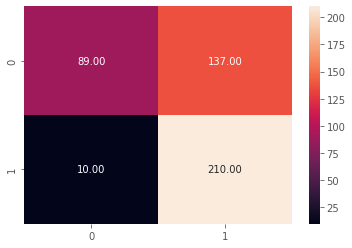

In [153]:
model(knn,x_train,x_test,y_train,y_test,train=False)

# Decision Tree

In [154]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [155]:
model(dt,x_train,x_test,y_train,y_test,train=True)

100.0


74.66367713004485
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       226
           1       0.74      0.75      0.74       220

    accuracy                           0.75       446
   macro avg       0.75      0.75      0.75       446
weighted avg       0.75      0.75      0.75       446

****************************************************************************************************
cross_val_score 0.7641618891618892


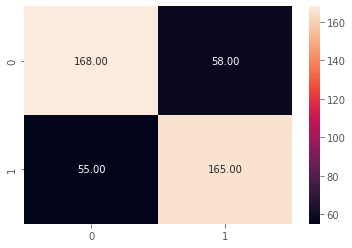

In [156]:
model(dt,x_train,x_test,y_train,y_test,train=False)

# Random Forest

In [157]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [158]:
model(rf,x_train,x_test,y_train,y_test,train=True)

100.0


86.54708520179372
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       226
           1       0.87      0.85      0.86       220

    accuracy                           0.87       446
   macro avg       0.87      0.87      0.87       446
weighted avg       0.87      0.87      0.87       446

****************************************************************************************************
cross_val_score 0.8834516334516334


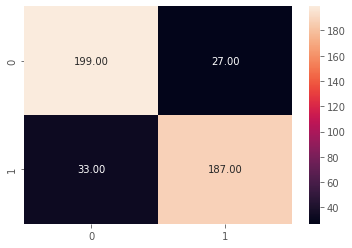

In [159]:
model(rf,x_train,x_test,y_train,y_test,train=False)

# Bagging Classifier

In [160]:
bg=BaggingClassifier()
bg.fit(x_train,y_train)

BaggingClassifier()

In [161]:
model(bg,x_train,x_test,y_train,y_test,train=True)

99.22928709055877


79.5964125560538
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       226
           1       0.80      0.78      0.79       220

    accuracy                           0.80       446
   macro avg       0.80      0.80      0.80       446
weighted avg       0.80      0.80      0.80       446

****************************************************************************************************
cross_val_score 0.8228023478023478


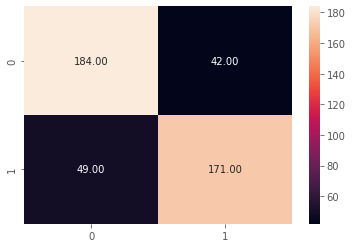

In [162]:
model(bg,x_train,x_test,y_train,y_test,train=False)

# GradientBoosting Classifier

In [163]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [164]:
model(gb,x_train,x_test,y_train,y_test,train=True)

97.59152215799615


80.94170403587444
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       226
           1       0.78      0.85      0.81       220

    accuracy                           0.81       446
   macro avg       0.81      0.81      0.81       446
weighted avg       0.81      0.81      0.81       446

****************************************************************************************************
cross_val_score 0.8383087633087634


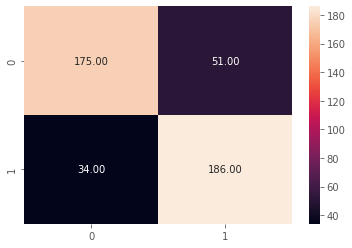

In [165]:
model(gb,x_train,x_test,y_train,y_test,train=False)

In [166]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [167]:
model(svc,x_train,x_test,y_train,y_test,train=True)

94.79768786127167


84.97757847533633
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       226
           1       0.83      0.88      0.85       220

    accuracy                           0.85       446
   macro avg       0.85      0.85      0.85       446
weighted avg       0.85      0.85      0.85       446

****************************************************************************************************
cross_val_score 0.8618777868777869


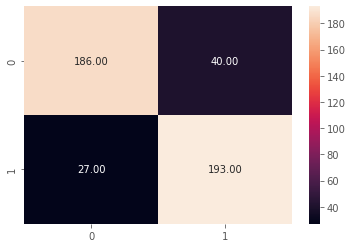

In [168]:
model(svc,x_train,x_test,y_train,y_test,train=False)

# Conclusion:- Random Forest and SVM is best performing model which has almost same F1 score and cross validation score

In [142]:
# Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV

In [143]:
# Random Forest
params={'n_estimators':[100],
       'criterion':['gini','entropy'],
       'max_depth':[4,5,6,7,8,9],
       'min_samples_split':[3,4,5,6,7],
       'min_samples_leaf':[3,4,5,7,9]}


In [144]:
gs=GridSearchCV(rf,param_grid=params,n_jobs=-1)
gs.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [3, 4, 5, 7, 9],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [100]})

In [145]:
gs.best_params_


{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 7,
 'n_estimators': 100}

In [190]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,min_samples_leaf=4,min_samples_split=8,n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=8)

In [191]:
model(rf,x_train,x_test,y_train,y_test,train=True)

97.39884393063583


85.20179372197309
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       226
           1       0.83      0.87      0.85       220

    accuracy                           0.85       446
   macro avg       0.85      0.85      0.85       446
weighted avg       0.85      0.85      0.85       446

****************************************************************************************************
cross_val_score 0.8504390754390754


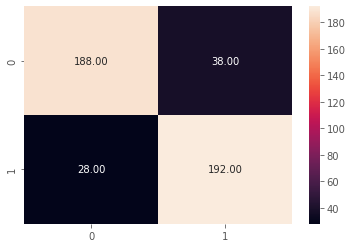

In [192]:
model(rf,x_train,x_test,y_train,y_test,train=False)

In [193]:
y_pred=rf.predict(x_test)

In [194]:
Pred=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [195]:
Pred

,Actual,Predicted
1145,1,1
1020,1,1
1106,1,1
836,0,0
833,0,0
...,...,...
1009,1,1
744,0,1
754,0,0
162,0,0


Text(0.5, 1.0, 'Actual vs Predicted')

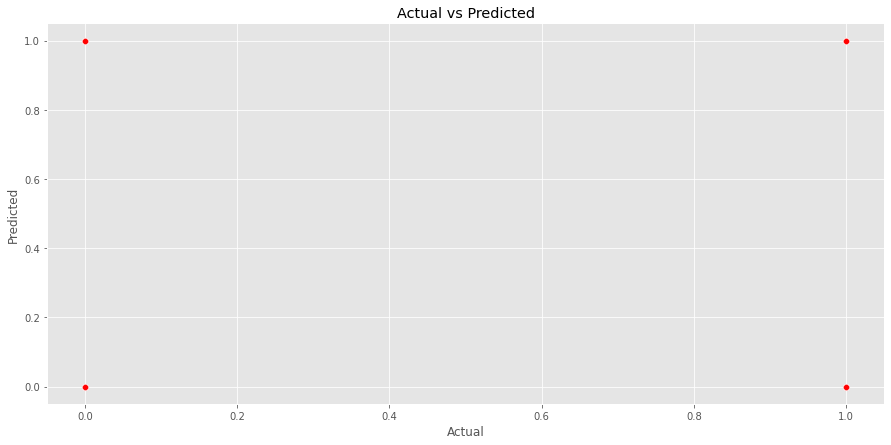

In [198]:
plt.figure(figsize=(15,7))
sns.scatterplot(y_test,y_pred,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

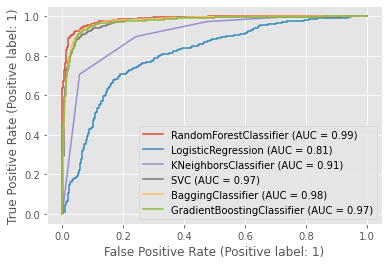

In [199]:
disp=plot_roc_curve(rf,pc,y)
plot_roc_curve(lr,pc,y,ax=disp.ax_)
plot_roc_curve(knn,pc,y,ax=disp.ax_)
plot_roc_curve(svc,pc,y,ax=disp.ax_)
plot_roc_curve(bg,pc,y,ax=disp.ax_)
plot_roc_curve(gb,pc,y,ax=disp.ax_)

# Final Conclusion:- Random Forest is best performing model with Accuracy_score=Cross_val_score=F1 Score=85%

In [200]:
# Saving the model
import pickle
filename='Insurance_Fraud'
pickle.dump(rf,open(filename,'wb'))